# Background 背景

Henda investment&Property consulting 是一家位于纽约布鲁克林的公司，致力于为有意购买或租用房地产的客户提供定制的咨询于代理服务。随着信息技术的发展，Henda发现包括机器学习在内的数据科学技术能够带来更好的商业机会。基于数据科学技术的推荐系统正在逐渐成为资深地产经纪人的好帮手。这些技术比个人经验更具有说服力。
Henda investment&Property consulting is a company located in Brooklyn, New York, dedicated to providing customized consulting and agency services for clients who are interested in buying or renting real estate. With the development of information technology, Henda found that data science technology including machine learning can bring better business opportunities. The recommendation system based on data science technology is gradually becoming a good helper for experienced real estate agents. These techniques are more convincing than personal experience.

## Business Problem 商业问题

搬家是难免的，但是我们不喜欢搬到一个非常陌生的环境。每一位客户在一个Neighbourhood长期生活了很久，已经养成了他们特有的生活习惯。因此，搬家搬到一个和以前相似的社区，就可以尽量避免环境变化所带来的不适应。因此Henda公司致力于为这些客户提供寻找合适的社区的服务。     
Moving is inevitable, but we don’t like moving to a very strange environment. Every customer has lived in a Neighborhood for a long time and has developed their unique living habits. Therefore, if you move to a similar neighborhood as before, you can try to avoid the unsuitability caused by environmental changes. Therefore Henda is committed to providing these customers with services to find suitable communities.

最近，一对老年夫妻希望Henda为他们提供咨询服务。他们原来住在纽约皇后区的的Hillcrest社区。现在他们希望搬到纽约Staten Island。他们填写了Henda公司的调查问卷（见链接）。根据调查问卷，他们的主要要求如下：
Recently, an elderly couple asked Henda to provide them with counseling services. They used to live in the Hillcrest community in Queens, New York. Now they hope to move to Staten Island, New York. They filled out Henda's questionnaire (see link). According to the questionnaire, their main requirements are as follows:

1. 他们希望我们为他们推荐与Hillcrest相似的社区，因为他们认为相似的社区可以避免他们改变他们的生活习惯。    
They want us to recommend communities similar to Hillcrest for them because they think similar communities can prevent them from changing their living habits.

2. 他们希望他们的neighbourhood有各种面包店，因为他们真的非常喜欢吃甜甜圈。     
They hope their neighbourhood has various bakeries because they really like donuts.

3. 他们希望他们的neighbourhood有比较多的Bus Stops，因为他们喜欢出游。而且他们每个月要去一次曼哈顿看望他们的儿子。     
They hope that their neighbourhood has more Bus Stops because they like to travel. And they go to Manhattan to visit their son once a month.

# Data 数据

我们将利用由NYU spatial data repository提供的纽约市的地图数据。    
We will use the map data of New York City provided by NYU spatial data repository. 
link 链接：https://geo.nyu.edu/catalog/nyu_2451_34572            

我们从Kaggle上获得了纽约市的房价数据。       
We obtained housing price data in New York City from Kaggle.     
lINK链接:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data     

Foursquare API for developers可以为我们提供关于venue categories, top tips, locaton data, ratings等信息来完成这项任务。     
Foursquare API for developers can provide us with information about venue categories, top tips, locaton data, ratings, etc. to complete this task.

此外，如geopy, forlium等python library也为我们提供了必要的帮助。      
In addition, python libraries such as geopy, forlium, etc. also provide us with necessary help.

# Methodology 方法

## Summary 概要

第一个要求，我们可以通过使用K-means聚类的方法实现城市区域分割。通过将neighbourhoods分割为多个簇，我们可以找到在Staten Island上与Hillcrest相似的Neighbourhoods。      
The first requirement is that we can achieve urban area segmentation by using K-means clustering. By dividing the neighborhoods into multiple clusters, we can find neighborhoods similar to Hillcrest on Staten Island.

通过提供来自Foursquare API的场地和收视率信息，可以解决第二和第三要求。      
The Second and Third requirement can be solved by providing venue and ratings information from Foursquare API.                
面包店较多且评价较好是判断我们目标社区的条件之一。        
More bakeries and better reviews are one of the conditions for judging our target community.       
通过对巴士站的分布以及线路分析我们能够获得第二个评判条件。       
Through the distribution of bus stops and route analysis, we can obtain the second criterion.

此外，因为要涉及房产买卖，因此我们必须关注房价。我们通过从Kaggle上获得纽约市房价数据，通过对比分析，为客户选择在价格上更合理的Neighbourhood.      
In addition, since real estate transactions are involved, we must pay attention to housing prices. We obtain New York City housing price data from Kaggle, and through comparative analysis, we can choose a more reasonable Neighbourhood for our customers.

## Procedures  过程

### Import Library

In [1]:
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    # tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # plotting library
print('Folium installed')


import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = '0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX' # your Foursquare ID
CLIENT_SECRET = '1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX
CLIENT_SECRET:1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA


### Download data 下载数据
从NYU的网站上下载NY的地理数据，格式为json。      
Download NY's geographic data from NYU's website in json format.

In [3]:
# 以下命令只适用于linux系统
#!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
#print('Data downloaded!')

#with open('newyork_data.json') as json_data:
#    newyork_data = json.load(json_data)

In [4]:
"""
import requests
 
json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
 
#读取数据
req = requests.get(json_url)
 
with open('newyork_data.json','w') as f:
    f.write(req.text)#req.text可以直接读取文件数据，返回字符串
newyork_data = req.json()
"""

"\nimport requests\n \njson_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'\n \n#读取数据\nreq = requests.get(json_url)\n \nwith open('newyork_data.json','w') as f:\n    f.write(req.text)#req.text可以直接读取文件数据，返回字符串\nnewyork_data = req.json()\n"

In [3]:
#urlopen模块 读取数据
from __future__ import(absolute_import,division,print_function, unicode_literals)
 
from urllib.request import urlopen
import json
 
json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
 
response = urlopen(json_url)
#读取数据
req = response.read()
#写入文件
with open('newyork_data.json','wb') as f:
    f.write(req)
#加载json格式
newyork_data = json.loads(req)

In [7]:
# newyork_data

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0],

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Processing json data  处理json数据
建立一个Dataframe，以容纳我们所需要的数据。      
Create a Dataframe to contain the data we need.

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

我们从web上获得的数据经过初步筛选后，可得以下表格。     
After preliminary screening of the data we obtained from the web, the following table is available.

In [9]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [10]:
neighborhoods['Borough'].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### New York City visulization 可视化
接下来我们调用geopy的函数，获得New York City的坐标。      
Next we call the function of geopy to get the coordinates of New York City.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


我们用folium画图，观察这些Neiborhood在New York的分布情况。     
We use folium to create a map and observe the distribution of these Neiborhoods in New York.

In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Neighborhoods Filter 筛选Queens和Staten Island的Neighborhoods
接下来，我们筛选出客户原来所在的Queens所有的Neighborhood，以及Staten Island上所有的Neighborhood。      
Next, we screened out all the neighborhoods in Queens where the customer was originally located, and all the neighborhoods on Staten Island.

In [14]:
client_data=neighborhoods[neighborhoods['Borough'].isin(["Queens","Staten Island"])].reset_index(drop=True)

#client_data = neighborhoods[neighborhoods['Borough'] == ('Queens' or 'Brooklyn')].reset_index(drop=True) #备选code
client_data.head()

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138

由于geopy我使用起来有些困难，因此我通过使用google.com获得了下面的坐标。       
Because geopy is a little difficult for me to use, I got the following coordinates by using google.com.      
https://www.google.com/search?sxsrf=ALeKk01RYFxIdbmWJrMuIYWt7dEZfIH1mw%3A1604555265889&source=hp&ei=AZKjX7PlM_ir0PEP6ayPgA4&q=%E7%BA%BD%E7%BA%A6%E7%9A%87%E5%90%8E%E5%8C%BA%E5%9D%90%E6%A0%87&oq=%E7%BA%BD%E7%BA%A6%E7%9A%87%E5%90%8E%E5%8C%BA%E5%9D%90%E6%A0%87&gs_lcp=CgZwc3ktYWIQAzoHCCMQ6gIQJzoICAAQsQMQgwE6BQguELEDOggILhCxAxCDAToCCC46DgguELEDEMcBEKMCEJMCOgUIABCxAzoCCAA6CwguELEDEMcBEKMCOg4ILhCxAxCDARDJAxCTAjoICC4QxwEQrwE6BAgAEAxQmQlY3ylg5ipoAHAAeACAAakIiAH_TZIBDjItMi4xOS4zLjEuMC4xmAEAoAEBqgEHZ3dzLXdperABCg&sclient=psy-ab&ved=0ahUKEwjz6ZKV2ursAhX4FTQIHWnWA-AQ4dUDCAk&uact=5

In [15]:
#address = 'Queens, NY'

#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))
latitude = 40.7127281
longitude = -74.0060152

In [16]:
# create map of Manhattan using latitude and longitude values
map_client = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(client_data['Latitude'], client_data['Longitude'], client_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_client)  
    
map_client

### Commen Venues 获取Neighborhood附近的Commen Venues
接下来我们要获得这些Neighborhood周围的Venues，从而进行Clustering。      
Next, we have to obtain the Venues around these Neighborhoods for clustering.

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url_0 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_o = requests.get(url_0).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_o])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:

client_area_venues = getNearbyVenues(names=client_data['Neighborhood'],
                                   latitudes=client_data['Latitude'],
                                   longitudes=client_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakw

In [19]:
print(client_area_venues.shape)
client_area_venues.head()

(2323, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Astoria              40.768509              -73.915654   
1      Astoria              40.768509              -73.915654   
2      Astoria              40.768509              -73.915654   
3      Astoria              40.768509              -73.915654   
4      Astoria              40.768509              -73.915654   

              Venue  Venue Latitude  Venue Longitude        Venue Category  
0      Favela Grill       40.767348       -73.917897  Brazilian Restaurant  
1    Orange Blossom       40.769856       -73.917012          Gourmet Shop  
2  Titan Foods Inc.       40.769198       -73.919253          Gourmet Shop  
3   CrossFit Queens       40.769404       -73.918977                   Gym  
4      Off The Hook       40.767200       -73.918104    Seafood Restaurant

In [2]:
#client_area_venues.count()

In [20]:
client_area_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                 
Annadale                                 11                      11     11   
Arden Heights                             5                       5      5   
Arlington                                 6                       6      6   
Arrochar                                 21                      21     21   
Arverne                                  20                      20     20   
Astoria                                  30                      30     30   
Astoria Heights                          13                      13     13   
Auburndale                               20                      20     20   
Bay Terrace                              40                      40     40   
Bayside                                  30                      30     30   
Bayswater                                 1                       1      1   
Beechhurst                               16                      16     16   
Bellaire                                 13                      13     13   
Belle Harbor                             17                      17     17   
Bellerose                                19                      19     19   
Blissville                               19                      19     19   
Bloomfield                                4                       4      4   
Breezy Point                              5                       5      5   
Briarwood                                10                      10     10   
Broad Channel                             5                       5      5   
Brookville                                2                       2      2   
Bulls Head                               30                      30     30   
Butler Manor                              4                       4      4   
Cambria Heights                          11                      11     11   
Castleton Corners                        14                      14     14   
Charleston                               27                      27     27   
Chelsea                                   6                       6      6   
Clifton                                  19                      19     19   
College Point                            30                      30     30   
Concord                                   7                       7      7   
Corona                                   18                      18     18   
Dongan Hills                             20                      20     20   
Douglaston                               26                      26     26   
East Elmhurst                            15                      15     15   
Edgemere                                 14                      14     14   
Egbertville                               4                       4      4   
Elm Park                                 12                      12     12   
Elmhurst                                 30                      30     30   
Eltingville                              30                      30     30   
Emerson Hill                              3                       3      3   
Far Rockaway                             28                      28     28   
Floral Park                               7                       7      7   
Flushing                                 30                      30     30   
Forest Hills                             30                      30     30   
Forest Hills Gardens                     22                      22     22   
Fox Hills                                 5                       5      5   
Fresh Meadows                            13                      13     13   
Glen Oaks                                20                      20     20   
Glendale                                  5                       5      5   
Graniteville                              2 

In [21]:
print('There are {} uniques categories.'.format(len(client_area_venues['Venue Category'].unique())))

There are 283 uniques categories.


由上面这些代码可知，一共有2323个Venue，共有283 uniques categories.      
From the above code, we can see that there are 2323 Venues and 283 uniques categories.

### One-hot / Clustering的前期准备，数据One-hot处理
为了使用K means聚类方法，我们首先要进行One-hot处理。       
In order to use K means clustering method, we must first perform One-hot processing.

In [22]:
# one hot encoding
client_area_onehot = pd.get_dummies(client_area_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
client_area_onehot['Neighborhood'] = client_area_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [client_area_onehot.columns[-1]] + list(client_area_onehot.columns[:-1])
client_area_onehot = client_area_onehot[fixed_columns]

In [23]:
client_area_onehot.head()

Yoga Studio  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0                  0                  0                   0   
1            0                  0                  0                   0   
2            0                  0                  0                   0   
3            0                  0                  0                   0   
4            0                  0                  0                   0   

   Airport Terminal  American Restaurant  Arcade  Arepa Restaurant  \
0                 0                    0       0                 0   
1                 0                    0       0                 0   
2                 0                    0       0                 0   
3                 0                    0       0                 0   
4                 0                    0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beach Bar  Beer Bar  Beer Garden  Big Box Store  \
0                 0      0          0         0            0              0   
1                 0      0          0         0            0              0   
2                 0      0          0         0            0              0   
3                 0      0          0         0            0              0   
4                 0      0          0         0            0              0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0       0           0              0          0         0              0   
1       0           0              0          0         0              0   
2       0           0              0          0         0              0   
3       0           0              0          0         0              0   
4       0           0              0          0         0              0   

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0           0                     1               0        0            0   
1           0                     0               0        0            0   
2           0                     0               0        0            0   
3           0                     0               0        0            0   
4           0                     0               0        0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   
1                0       0             0              0         0   
2                0       0             0              0         0   
3                0       0             0              0         0   
4                0       0             0              0         0   

   Bus Station  

In [24]:
client_area_onehot.shape

(2323, 283)

In [25]:
client_area_grouped = client_area_onehot.groupby('Neighborhood').mean().reset_index()

In [26]:
client_area_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  Afghan Restaurant  \
0       Annadale          0.0                0.0                0.0   
1  Arden Heights          0.0                0.0                0.0   
2      Arlington          0.0                0.0                0.0   
3       Arrochar          0.0                0.0                0.0   
4        Arverne          0.0                0.0                0.0   

   African Restaurant  Airport Terminal  American Restaurant  Arcade  \
0                 0.0               0.0             0.181818     0.0   
1                 0.0               0.0             0.000000     0.0   
2                 0.0               0.0             0.000000     0.0   
3                 0.0               0.0             0.000000     0.0   
4                 0.0               0.0             0.000000     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0                  0.0               0.0            0.000000              0.0   
1                  0.0               0.0            0.000000              0.0   
2                  0.0               0.0            0.000000              0.0   
3                  0.0               0.0            0.047619              0.0   
4                  0.0               0.0            0.000000              0.0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0        0.0    0.000000     0.0   0.0  0.0             0.0               0.0   
1        0.0    0.000000     0.0   0.0  0.0             0.0               0.0   
2        0.0    0.000000     0.0   0.0  0.0             0.0               0.0   
3        0.0    0.047619     0.0   0.0  0.0             0.0               0.0   
4        0.0    0.000000     0.0   0.0  0.0             0.0               0.0   

   Basketball Court  Beach  Beach Bar  Beer Bar  Beer Garden  Big Box Store  \
0               0.0   0.00        0.0       0.0          0.0            0.0   
1               0.0   0.00        0.0       0.0          0.0            0.0   
2               0.0   0.00        0.0       0.0          0.0            0.0   
3               0.0   0.00        0.0       0.0          0.0            0.0   
4               0.0   0.05        0.0       0.0          0.0            0.0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0     0.0        0.00       0.000000        0.0       0.0            0.0   
1     0.0        0.00       0.000000        0.0       0.0            0.0   
2     0.0        0.00       0.166667        0.0       0.0            0.0   
3     0.0        0.00       0.000000        0.0       0.0            0.0   
4     0.0        0.05       0.000000        0.0       0.0            0.0   

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0         0.0                   0.0             0.0      0.0          0.0   
1         0.0                   0.0             0.0      0.0          0.0   
2         0.0                   0.0             0.0      0.0          0.0   
3         0.0                   0.0             0.0      0.0          0.0   
4         0.0                   0.0             0.0      0.0          0.0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0              0.0     0.0           0.0           0.00       0.0   
1              0.0     0.0           0.0           0.00       0.0   
2              0.0     0.0           0.0           0.00       0.0   
3              0.0     0.0           0.0           0.00       0.0 

In [27]:
client_area_grouped.shape

(142, 283)

### Top Venues
接下来，我们要获得这些Neiborhood的Top venues。      
Next, we want to obtain these Neiborhood Top venues.

In [28]:
num_top_venues = 5

for hood in client_area_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = client_area_grouped[client_area_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.18
1  American Restaurant  0.18
2        Deli / Bodega  0.09
3           Restaurant  0.09
4        Train Station  0.09


----Arden Heights----
           venue  freq
0       Bus Stop   0.2
1    Coffee Shop   0.2
2  Deli / Bodega   0.2
3       Pharmacy   0.2
4    Pizza Place   0.2


----Arlington----
           venue  freq
0    Coffee Shop  0.17
1  Deli / Bodega  0.17
2   Home Service  0.17
3       Bus Stop  0.17
4  Boat or Ferry  0.17


----Arrochar----
                      venue  freq
0                  Bus Stop  0.14
1        Italian Restaurant  0.10
2             Deli / Bodega  0.10
3               Pizza Place  0.05
4  Mediterranean Restaurant  0.05


----Arverne----
            venue  freq
0       Surf Spot  0.20
1  Sandwich Place  0.10
2   Metro Station  0.10
3       Wine Shop  0.05
4      Donut Shop  0.05


----Astoria----
                venue  freq
0  Seafood Restaurant  0.10
1        Dessert Shop  0.07
2 

              venue  freq
0              Bank  0.18
1        Playground  0.12
2       Pizza Place  0.12
3  Sushi Restaurant  0.12
4      Burger Joint  0.06


----Laurelton----
                           venue  freq
0           Caribbean Restaurant   0.4
1                 Cosmetics Shop   0.2
2                           Park   0.2
3                  Train Station   0.2
4  Paper / Office Supplies Store   0.0


----Lefrak City----
                    venue  freq
0                  Bakery  0.10
1        Department Store  0.10
2          Cosmetics Shop  0.10
3         Bubble Tea Shop  0.05
4  Furniture / Home Store  0.05


----Lighthouse Hill----
                venue  freq
0          Art Museum  0.17
1  Italian Restaurant  0.17
2      Massage Studio  0.17
3                 Spa  0.17
4               Trail  0.17


----Lindenwood----
                     venue  freq
0      Japanese Restaurant  0.11
1                    Hotel  0.11
2            Deli / Bodega  0.11
3  Fruit & Vegetable Store  0

4              Grocery Store  0.06


----Sunnyside Gardens----
              venue  freq
0       Pizza Place  0.07
1               Bar  0.07
2  Sushi Restaurant  0.07
3       Coffee Shop  0.07
4     Deli / Bodega  0.03


----Todt Hill----
                   venue  freq
0                   Park   1.0
1            Yoga Studio   0.0
2                 Office   0.0
3            Outlet Mall   0.0
4  Outdoors & Recreation   0.0


----Tompkinsville----
                venue  freq
0       Deli / Bodega  0.13
1                Park  0.09
2             Brewery  0.09
3            Bus Stop  0.09
4  Italian Restaurant  0.04


----Tottenville----
                    venue  freq
0          Cosmetics Shop  0.12
1  Thrift / Vintage Store  0.12
2            Home Service  0.12
3      Mexican Restaurant  0.12
4           Deli / Bodega  0.12


----Travis----
            venue  freq
0           Hotel  0.21
1             Gym  0.14
2  Baseball Field  0.07
3     Comedy Club  0.07
4     Sports Club  0.07


----Ut

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = client_area_grouped['Neighborhood']

for ind in np.arange(client_area_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(client_area_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Annadale   American Restaurant           Pizza Place   
1  Arden Heights           Coffee Shop              Pharmacy   
2      Arlington           Coffee Shop          Home Service   
3       Arrochar              Bus Stop         Deli / Bodega   
4        Arverne             Surf Spot        Sandwich Place   

  3rd Most Common Venue  4th Most Common Venue     5th Most Common Venue  \
0                  Park             Restaurant                     Diner   
1         Deli / Bodega               Bus Stop               Pizza Place   
2         Grocery Store          Deli / Bodega             Boat or Ferry   
3    Italian Restaurant  Outdoors & Recreation  Mediterranean Restaurant   
4         Metro Station               Bus Stop                     Beach   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Train Station                  Food         Deli / Bodega   
1            Eye Doctor    Falafel Restaurant                  Farm   
2              Bus Stop    Falafel Restaurant                  Farm   
3            Bagel Shop    Athletics & Sports        Sandwich Place   
4       Thai Restaurant                  Café            Restaurant   

       9th Most Common Venue 10th Most Common Venue  
0               Dance Studio            Flower Shop  
1             Farmers Market   Fast Food Restaurant  
2             Farmers Market   Fast Food Restaurant  
3  Middle Eastern Restaurant      Polish Restaurant  
4                 Donut Shop             Board Shop

现在我们就可以获得各个Neighborhood 的Top10 的Common Venue。我们将以此进行K means聚类。      
Now we can get the Top10 Common Venue of each Neighborhood. We will use this to perform K means clustering.

### Elbow Method / Elbow方法寻找最佳k值    
为了使用k-means，必须确定一个k值以确定簇的数量。    
In order to use k-means, a value of k must be determined to determine the number of clusters.      
参考  See  https://www.zhihu.com/question/29208148。     
在这里我们使用Elbow的方法，令k=range(1,30)，根据elbow点（评价曲线曲率变化剧烈的点）来确定最佳的K值。      
Here we use Elbow's method, let k=range(1,30), and determine the best K value according to the elbow point (the point where the curvature of the evaluation curve changes drastically).

In [31]:
import matplotlib.pyplot as plt

In [32]:
client_area_grouped_clustering = client_area_grouped.drop('Neighborhood', 1)

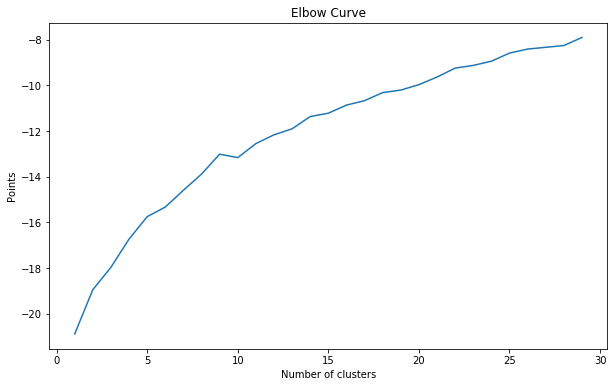

In [33]:
n_cluster = range(1,30)

kmeans = [KMeans(n_clusters=i).fit(client_area_grouped_clustering) for i in n_cluster]

scores = [kmeans[i].score(client_area_grouped_clustering) for i in range(len(kmeans))]
 
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Points')
plt.title('Elbow Curve')
plt.show()

我们可以观察到，在K=10这个点，曲线的曲率有明显的变化。k>10，曲线变得平缓。因此我们令K=10.      
We can observe that at the point K=10, the curvature of the curve changes significantly. k>10, the curve becomes flat. Therefore we set K=10.

In [34]:
# set number of clusters
kclusters = 10

client_area_grouped_clustering = client_area_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(client_area_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [53]:
neighborhoods_venues_sorted

Cluster Labels          Neighborhood            1st Most Common Venue  \
0                 1              Annadale              American Restaurant   
1                 0         Arden Heights                      Coffee Shop   
2                 0             Arlington                      Coffee Shop   
3                 0              Arrochar                         Bus Stop   
4                 1               Arverne                        Surf Spot   
5                 1               Astoria               Seafood Restaurant   
6                 1       Astoria Heights                             Food   
7                 1            Auburndale               Italian Restaurant   
8                 1           Bay Terrace                       Donut Shop   
9                 1               Bayside                 Greek Restaurant   
10                3             Bayswater                       Playground   
11                1            Beechhurst               Chinese Restaurant   
12                1              Bellaire                Convenience Store   
13                1          Belle Harbor                            Beach   
14                1             Bellerose                    Deli / Bodega   
15                1            Blissville                       Donut Shop   
16                0            Bloomfield                       Theme Park   
17                5          Breezy Point                            Beach   
18                1             Briarwood                    Deli / Bodega   
19                0         Broad Channel                         Dive Bar   
20                7            Brookville                 Recording Studio   
21                1            Bulls Head                      Pizza Place   
22                1          Butler Manor                   Baseball Field   
23                1       Cambria Heights             Caribbean Restaurant   
24                1     Castleton Corners                      Pizza Place   
25                1            Charleston                   Cosmetics Shop   
26                0               Chelsea               Spanish Restaurant   
27                1               Clifton                    Grocery Store   
28                1         College Point                      Pizza Place   
29                1               Concord                      Coffee Shop   
30                1                Corona               Mexican Restaurant   
31                1          Dongan Hills                      Pizza Place   
32                1            Douglaston                    Deli / Bodega   
33                1         East Elmhurst                       Donut Shop   
34                1              Edgemere                    Metro Station   
35                1           Egbertville                   Cosmetics Shop   
36                0              Elm Park                         Bus Stop   
37                1              Elmhurst                  Thai Restaurant   
38                1           Eltingville                 Sushi Restaurant   
39                1          Emerson Hill       Construction & Landscaping   
40                1          Far Rockaway                    Deli / Bodega   
41                1           Floral Park                Indian Restaurant   
42                1              Flushing                Hotpot Restaurant   
43                1          Forest Hills                      Yoga Studio   
44                1  Forest Hills Gardens                    Grocery Store   
45                0             Fox Hills                         Bus Stop   
46                1         Fresh Meadows                      Bus Station   
47                1             Glen Oaks                         Pharmacy   
48                0              Glendale              Arts & Crafts Store   
49                8          Graniteville                    Grocery Store   
50                1        

In [61]:
#add clustering labels

#neighborhoods_venues_sorted = neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Cluster Labels          Neighborhood            1st Most Common Venue  \
0                 1              Annadale              American Restaurant   
1                 0         Arden Heights                      Coffee Shop   
2                 0             Arlington                      Coffee Shop   
3                 0              Arrochar                         Bus Stop   
4                 1               Arverne                        Surf Spot   
5                 1               Astoria               Seafood Restaurant   
6                 1       Astoria Heights                             Food   
7                 1            Auburndale               Italian Restaurant   
8                 1           Bay Terrace                       Donut Shop   
9                 1               Bayside                 Greek Restaurant   
10                3             Bayswater                       Playground   
11                1            Beechhurst               Chinese Restaurant   
12                1              Bellaire                Convenience Store   
13                1          Belle Harbor                            Beach   
14                1             Bellerose                    Deli / Bodega   
15                1            Blissville                       Donut Shop   
16                0            Bloomfield                       Theme Park   
17                5          Breezy Point                            Beach   
18                1             Briarwood                    Deli / Bodega   
19                0         Broad Channel                         Dive Bar   
20                7            Brookville                 Recording Studio   
21                1            Bulls Head                      Pizza Place   
22                1          Butler Manor                   Baseball Field   
23                1       Cambria Heights             Caribbean Restaurant   
24                1     Castleton Corners                      Pizza Place   
25                1            Charleston                   Cosmetics Shop   
26                0               Chelsea               Spanish Restaurant   
27                1               Clifton                    Grocery Store   
28                1         College Point                      Pizza Place   
29                1               Concord                      Coffee Shop   
30                1                Corona               Mexican Restaurant   
31                1          Dongan Hills                      Pizza Place   
32                1            Douglaston                    Deli / Bodega   
33                1         East Elmhurst                       Donut Shop   
34                1              Edgemere                    Metro Station   
35                1           Egbertville                   Cosmetics Shop   
36                0              Elm Park                         Bus Stop   
37                1              Elmhurst                  Thai Restaurant   
38                1           Eltingville                 Sushi Restaurant   
39                1          Emerson Hill       Construction & Landscaping   
40                1          Far Rockaway                    Deli / Bodega   
41                1           Floral Park                Indian Restaurant   
42                1              Flushing                Hotpot Restaurant   
43                1          Forest Hills                      Yoga Studio   
44                1  Forest Hills Gardens                    Grocery Store   
45                0             Fox Hills                         Bus Stop   
46                1         Fresh Meadows                      Bus Station   
47                1             Glen Oaks                         Pharmacy   
48                0              Glendale              Arts & Crafts Store   
49                8          Graniteville                    Grocery Store   
50                1        

In [62]:
client_area_merged= client_data
client_area_merged

Borough          Neighborhood   Latitude  Longitude
0           Queens               Astoria  40.768509 -73.915654
1           Queens              Woodside  40.746349 -73.901842
2           Queens       Jackson Heights  40.751981 -73.882821
3           Queens              Elmhurst  40.744049 -73.881656
4           Queens          Howard Beach  40.654225 -73.838138
5           Queens                Corona  40.742382 -73.856825
6           Queens          Forest Hills  40.725264 -73.844475
7           Queens           Kew Gardens  40.705179 -73.829819
8           Queens         Richmond Hill  40.697947 -73.831833
9           Queens              Flushing  40.764454 -73.831773
10          Queens      Long Island City  40.750217 -73.939202
11          Queens             Sunnyside  40.740176 -73.926916
12          Queens         East Elmhurst  40.764073 -73.867041
13          Queens               Maspeth  40.725427 -73.896217
14          Queens             Ridgewood  40.708323 -73.901435
15          Queens              Glendale  40.702762 -73.870742
16          Queens             Rego Park  40.728974 -73.857827
17          Queens             Woodhaven  40.689887 -73.858110
18          Queens            Ozone Park  40.680708 -73.843203
19          Queens      South Ozone Park  40.668550 -73.809865
20          Queens         College Point  40.784903 -73.843045
21          Queens            Whitestone  40.781291 -73.814202
22          Queens               Bayside  40.766041 -73.774274
23          Queens            Auburndale  40.761730 -73.791762
24          Queens           Little Neck  40.770826 -73.738898
25          Queens            Douglaston  40.766846 -73.742498
26          Queens             Glen Oaks  40.749441 -73.715481
27          Queens             Bellerose  40.728573 -73.720128
28          Queens     Kew Gardens Hills  40.722578 -73.820878
29          Queens         Fresh Meadows  40.734394 -73.782713
30          Queens             Briarwood  40.710935 -73.811748
31          Queens        Jamaica Center  40.704657 -73.796902
32          Queens       Oakland Gardens  40.745619 -73.754950
33          Queens        Queens Village  40.718893 -73.738715
34          Queens                Hollis  40.711243 -73.759250
35          Queens         South Jamaica  40.696911 -73.790426
36          Queens            St. Albans  40.694445 -73.758676
37          Queens              Rochdale  40.675211 -73.772588
38          Queens   Springfield Gardens  40.666230 -73.760421
39          Queens       Cambria Heights  40.692775 -73.735269
40          Queens              Rosedale  40.659816 -73.735261
41          Queens          Far Rockaway  40.603134 -73.754980
42          Queens         Broad Channel  40.603027 -73.820055
43          Queens          Breezy Point  40.557401 -73.925512
44          Queens              Steinway  40.775923 -73.902290
45          Queens            Beechhurst  40.792781 -73.804365
46          Queens           Bay Terrace  40.782843 -73.776802
47          Queens              Edgemere  40.595642 -73.776133
48          Queens               Arverne  40.589144 -73.791992
49          Queens        Rockaway Beach  40.582802 -73.822361
50          Queens              Neponsit  40.572037 -73.857547
51          Queens           Murray Hill  40.764126 -73.812763
52          Queens           Floral Park  40.741378 -73.708847
53          Queens            Holliswood  40.720957 -73.767142
54          Queens       Jamaica Estates  40.716805 -73.787227
55          Queens       Queensboro Hill  40.744572 -73.825809
56          Queens             Hillcrest  40.723825 -73.797603
57          Queens            Ravenswood  40.761705 -73.931575
58          Queens            Lindenwood  40.663918 -73.849638
59          Queens             Laurelton  40.667884 -73.740256
60          Queens           Lefrak City  40.736075 -73.862525
61          Queens          Belle Harbor  40.576156 -73.854018
62          Queens         Rockaway Park  

In [64]:
client_area_merged = client_area_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#client_area_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
client_area_merged

Borough          Neighborhood   Latitude  Longitude  \
0           Queens               Astoria  40.768509 -73.915654   
1           Queens              Woodside  40.746349 -73.901842   
2           Queens       Jackson Heights  40.751981 -73.882821   
3           Queens              Elmhurst  40.744049 -73.881656   
4           Queens          Howard Beach  40.654225 -73.838138   
5           Queens                Corona  40.742382 -73.856825   
6           Queens          Forest Hills  40.725264 -73.844475   
7           Queens           Kew Gardens  40.705179 -73.829819   
8           Queens         Richmond Hill  40.697947 -73.831833   
9           Queens              Flushing  40.764454 -73.831773   
10          Queens      Long Island City  40.750217 -73.939202   
11          Queens             Sunnyside  40.740176 -73.926916   
12          Queens         East Elmhurst  40.764073 -73.867041   
13          Queens               Maspeth  40.725427 -73.896217   
14          Queens             Ridgewood  40.708323 -73.901435   
15          Queens              Glendale  40.702762 -73.870742   
16          Queens             Rego Park  40.728974 -73.857827   
17          Queens             Woodhaven  40.689887 -73.858110   
18          Queens            Ozone Park  40.680708 -73.843203   
19          Queens      South Ozone Park  40.668550 -73.809865   
20          Queens         College Point  40.784903 -73.843045   
21          Queens            Whitestone  40.781291 -73.814202   
22          Queens               Bayside  40.766041 -73.774274   
23          Queens            Auburndale  40.761730 -73.791762   
24          Queens           Little Neck  40.770826 -73.738898   
25          Queens            Douglaston  40.766846 -73.742498   
26          Queens             Glen Oaks  40.749441 -73.715481   
27          Queens             Bellerose  40.728573 -73.720128   
28          Queens     Kew Gardens Hills  40.722578 -73.820878   
29          Queens         Fresh Meadows  40.734394 -73.782713   
30          Queens             Briarwood  40.710935 -73.811748   
31          Queens        Jamaica Center  40.704657 -73.796902   
32          Queens       Oakland Gardens  40.745619 -73.754950   
33          Queens        Queens Village  40.718893 -73.738715   
34          Queens                Hollis  40.711243 -73.759250   
35          Queens         South Jamaica  40.696911 -73.790426   
36          Queens            St. Albans  40.694445 -73.758676   
37          Queens              Rochdale  40.675211 -73.772588   
38          Queens   Springfield Gardens  40.666230 -73.760421   
39          Queens       Cambria Heights  40.692775 -73.735269   
40          Queens              Rosedale  40.659816 -73.735261   
41          Queens          Far Rockaway  40.603134 -73.754980   
42          Queens         Broad Channel  40.603027 -73.820055   
43          Queens          Breezy Point  40.557401 -73.925512   
44          Queens              Steinway  40.775923 -73.902290   
45          Queens            Beechhurst  40.792781 -73.804365   
46          Queens           Bay Terrace  40.782843 -73.776802   
47          Queens              Edgemere  40.595642 -73.776133   
48          Queens               Arverne  40.589144 -73.791992   
49          Queens        Rockaway Beach  40.582802 -73.822361   
50          Queens              Neponsit  40.572037 -73.857547   
51          Queens           Murray Hill  40.764126 -73.812763   
52          Queens           Floral Park  40.741378 -73.708847   
53          Queens            Holliswood  40.720957 -73.767142   
54          Queens       Jamaica Estates  40.716805 -73.787227   
55          Queens       Queensboro Hill  40.744572 -73.825809   
56          Queens             Hillcrest  40.723825 -73.797603   
57          Queens            Ravenswood  40.761705 -73.931575   
58          Queens            Lindenwood  40.663918 -73.849638   
59          Queens             Laurelton  40.667884

In [58]:
# client_merged

### Maps of Queens and Staten Island / Queens和Staten Island的Neiborhood图

In [68]:
# create map
latitude_temp = 40.6782
longitude_temp = -73.9442
map_clusters = folium.Map(location=[latitude_temp, longitude_temp], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(client_area_merged['Latitude'], client_area_merged['Longitude'], client_area_merged['Neighborhood'], client_area_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Select Neighborhood / 根据客户需求选出合适的Neighborhood

下面是根据客户需求考虑问题的环节。首先我们先观察一下客户原来所在的Hillcrest.     
The following is a link to consider issues based on customer needs. First, let's take a look at Hillcrest where the customer was originally located.

In [69]:
client_area_merged.loc[client_area_merged["Neighborhood"]=="Hillcrest"]

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
56  Queens    Hillcrest  40.723825 -73.797603               1   

   1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
56            Donut Shop  College Academic Building        Ice Cream Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
56  College Basketball Court                Market         Grocery Store   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
56            Food Court           Coffee Shop     Mobile Phone Shop   

   10th Most Common Venue  
56        College Stadium

这个地方最常见的就是Donut Shop.然后还有很多的其他餐饮店，比如Ice Cream Shop，Coffee Shop等。      
The most common place in this place is Donut Shop. Then there are many other restaurants, such as Ice Cream Shop, Coffee Shop and so on. 

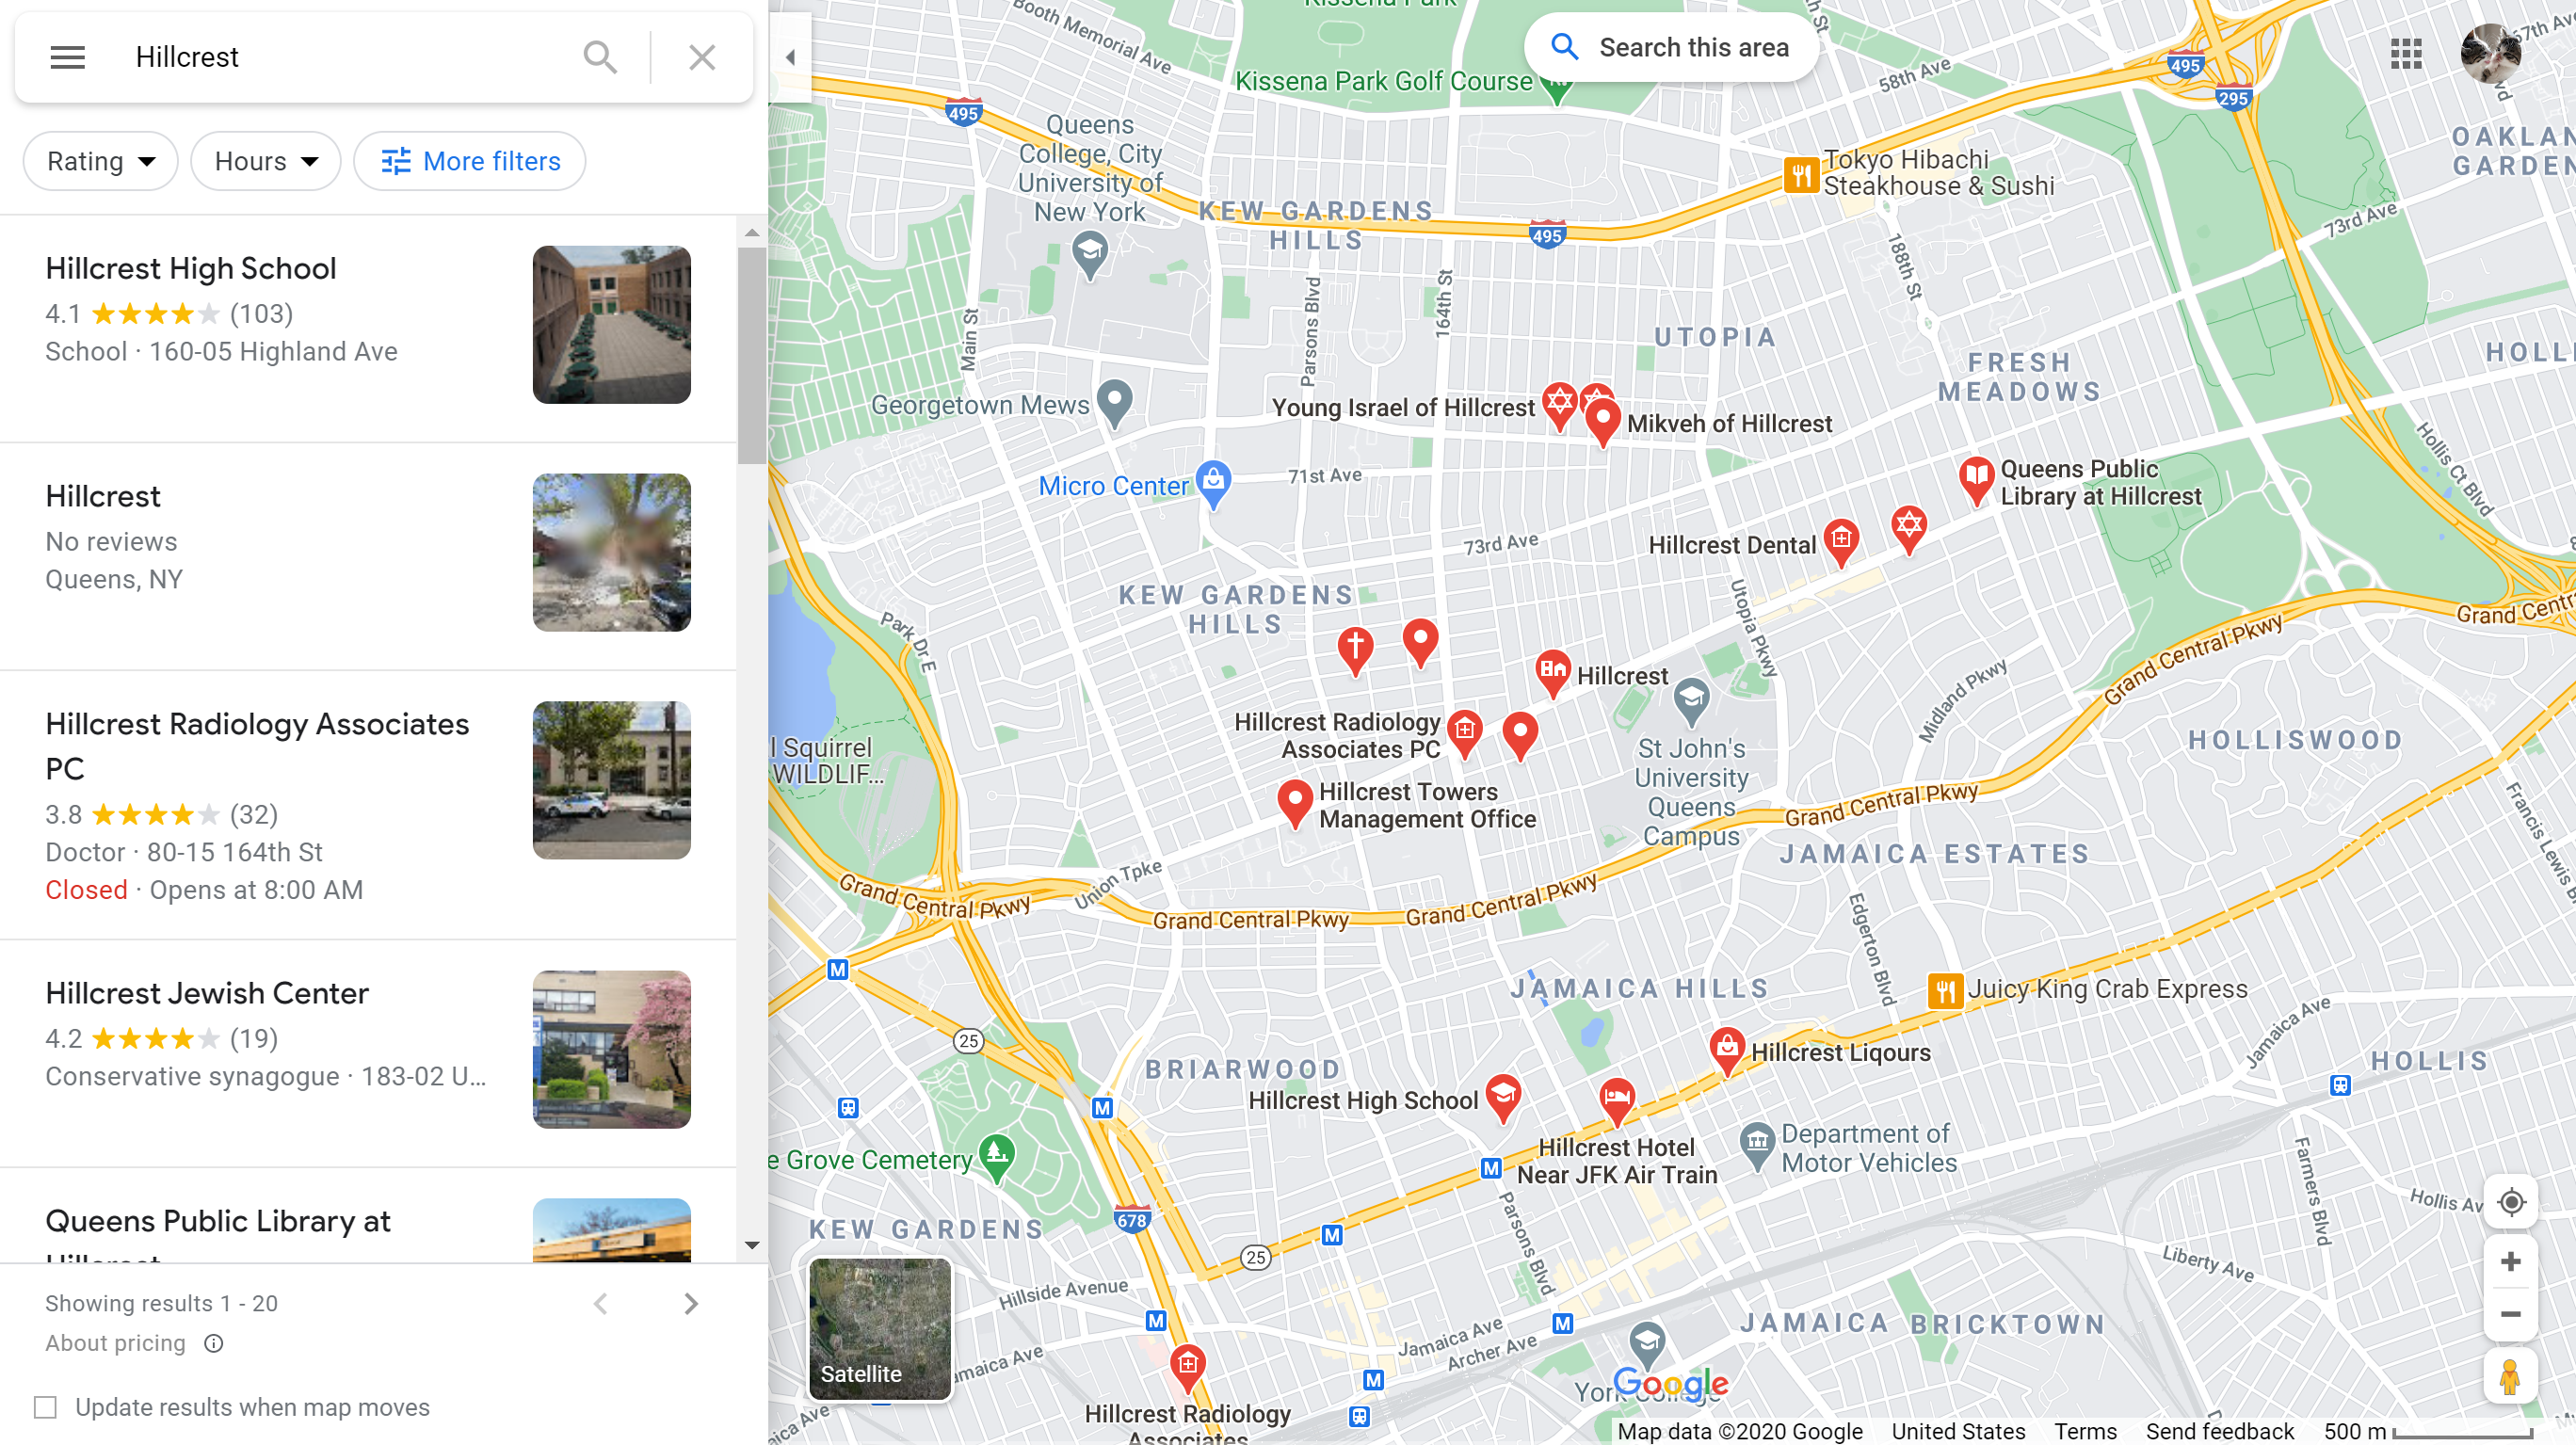

下面我们从Staten Island中选出Cluster相同的Neighborhood。然后我们根据Top comment venues来探索潜在的目标Neighborhood.       
Below we select the same Neighborhood of the Cluster from Staten Island. Then we explore the potential target Neighborhood based on Top comment venues.

In [70]:
potential_choice_temp = client_area_merged.loc[client_area_merged["Cluster Labels"]== 1]
potential_choice = potential_choice_temp.loc[potential_choice_temp["Borough"]== "Staten Island"].reset_index(drop=True)

In [71]:
potential_choice

Borough       Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Staten Island         St. George  40.644982 -74.079353               1   
1   Staten Island          Stapleton  40.626928 -74.077902               1   
2   Staten Island           Rosebank  40.615305 -74.069805               1   
3   Staten Island      West Brighton  40.631879 -74.107182               1   
4   Staten Island        South Beach  40.580247 -74.079553               1   
5   Staten Island  Castleton Corners  40.613336 -74.119181               1   
6   Staten Island    New Springville  40.594252 -74.164960               1   
7   Staten Island             Travis  40.586314 -74.190737               1   
8   Staten Island           New Dorp  40.572572 -74.116479               1   
9   Staten Island            Oakwood  40.558462 -74.121566               1   
10  Staten Island        Great Kills  40.549480 -74.149324               1   
11  Staten Island        Eltingville  40.542231 -74.164331               1   
12  Staten Island           Annadale  40.538114 -74.178549               1   
13  Staten Island            Woodrow  40.541968 -74.205246               1   
14  Staten Island        Silver Lake  40.619193 -74.096290               1   
15  Staten Island          Sunnyside  40.612760 -74.097126               1   
16  Staten Island        Westerleigh  40.621090 -74.133041               1   
17  Staten Island           Old Town  40.596329 -74.087511               1   
18  Staten Island       Dongan Hills  40.588673 -74.096399               1   
19  Staten Island      Midland Beach  40.573527 -74.093483               1   
20  Staten Island         Grant City  40.576216 -74.105856               1   
21  Staten Island     New Dorp Beach  40.564255 -74.104327               1   
22  Staten Island        Bay Terrace  40.553988 -74.139166               1   
23  Staten Island           Huguenot  40.531912 -74.191741               1   
24  Staten Island    Pleasant Plains  40.524699 -74.219831               1   
25  Staten Island       Butler Manor  40.506082 -74.229504               1   
26  Staten Island         Charleston  40.530531 -74.232158               1   
27  Staten Island          Rossville  40.549404 -74.215729               1   
28  Staten Island         Greenridge  40.555295 -74.170794               1   
29  Staten Island  Heartland Village  40.589139 -74.159022               1   
30  Staten Island         Bulls Head  40.609592 -74.159409               1   
31  Staten Island            Clifton  40.619178 -74.072642               1   
32  Staten Island            Concord  40.604473 -74.084024               1   
33  Staten Island       Emerson Hill  40.606794 -74.097762               1   
34  Staten Island      Manor Heights  40.601810 -74.120594               1   
35  Staten Island        Willowbrook  40.603707 -74.132084               1   
36  Staten Island        Egbertville  40.579119 -74.127272               1   
37  Staten Island       Prince's Bay  40.526264 -74.201526               1   
38  Staten Island    Richmond Valley  40.519541 -74.229571               1   

         1st Most Common Venue       2nd Most Common Venue  \
0               Clothing Store         Sporting Goods Shop   
1                  Pizza Place              Discount Store   
2           Mexican Restaurant               Grocery Store   
3                  Coffee Shop                 Music Store   
4                         Pier               Deli / Bodega   
5                  Pizza Place                        Bank   
6                   Bagel Shop                 Pizza Place   
7                        Hotel                         Gym   
8           Italian Restaurant                 Pizza Place   
9                Women's Store                  Playground   
10                         Bar          Italian Restaurant   
11            Sushi Restaurant                 Pizza Place   
12         American Restaurant                 Pizza Place   
13                   

我们以1st Most Common Venue = “Donut Shop" 来进行筛选.     
We use 1st Most Common Venue = "Donut Shop" to filter.

In [72]:
potential_choice_1 = potential_choice.loc[potential_choice["1st Most Common Venue"] == "Donut Shop"]
potential_choice_1

Borough     Neighborhood   Latitude  Longitude  Cluster Labels  \
22  Staten Island      Bay Terrace  40.553988 -74.139166               1   
24  Staten Island  Pleasant Plains  40.524699 -74.219831               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
22            Donut Shop        Clothing Store           Supermarket   
24            Donut Shop           Yoga Studio        Discount Store   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
22         Women's Store     Mobile Phone Shop        Cosmetics Shop   
24              Bus Stop  Fast Food Restaurant          Liquor Store   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
22   American Restaurant            Kids Store             Gift Shop   
24    Salon / Barbershop            Toll Plaza                Bakery   

   10th Most Common Venue  
22       Sushi Restaurant  
24         Breakfast Spot

我们对这两个潜在的Neighborhoods进行可视化，初步观察它们的地理位置。      
We visualized these two potential Neighborhoods and initially observed their geographic locations.

In [73]:

# create map
map_potential_choice_1 = folium.Map(location=[40.524699, -74.219831], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(potential_choice_1['Latitude'], potential_choice_1['Longitude'], potential_choice_1['Neighborhood'], potential_choice_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_potential_choice_1)
       
map_potential_choice_1

### Exploring Potential Neighborhoods / 探索潜在的Neighborhoods

In [74]:
CLIENT_ID = '0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX' # your Foursquare ID
CLIENT_SECRET = '1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX
CLIENT_SECRET:1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA


#### Pleasant Plains

由于geopy不好用，我仍然直接Google了这个地方的坐标。然后我们认为这对夫妇非常喜欢吃Donut，那么他们大概率会在Bakery中可以买到这些东西，因此我们向Foursqure发出的query请求为“Bakery”。         
Because geopy is not easy to use, I still Google the coordinates of this place directly. Then we thought that this couple likes to eat Donut very much, so they will be able to buy these things in Bakery, so our query request to Foursqure is "Bakery".      

值得注意的是，在我们的调查问卷中，该夫妇表示他们拥有汽车，但开车的频率比较低。他们喜欢在社区附近步行或是散步。因此我们将探索范围缩小到1000米，以便他们步行即可到达他们常去的目的地。     
It is worth noting that in our questionnaire, the couple stated that they own a car but drive less frequently. They like to walk or walk around the community. So we narrowed the scope of exploration to 1,000 meters so that they can reach their favorite destinations on foot.      

In [75]:
latitude_pp = 40.524699
longitude_pp = -74.219831

In [76]:
search_query = 'Bakery'
radius = 1000
print(search_query + ' .... OK!')

Bakery .... OK!


In [77]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_pp, longitude_pp, VERSION, search_query, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX&client_secret=1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA&ll=40.524699,-74.219831&v=20180604&query=Bakery&radius=1000&limit=30'

In [78]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5fa3a9d450a2d03ad55f3986'},
 'response': {'venues': [{'id': '4e10a6b0a809291902afb275',
    'name': 'La Dolce Bakery & Pastry Shoppe',
    'location': {'address': '6321 Amboy Rd',
     'lat': 40.523319,
     'lng': -74.216365,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.523319,
       'lng': -74.216365},
      {'label': 'entrance', 'lat': 40.523316, 'lng': -74.216217}],
     'distance': 331,
     'postalCode': '10309',
     'cc': 'US',
     'city': 'Staten Island',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['6321 Amboy Rd',
      'Staten Island, NY 10309',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16a941735',
      'name': 'Bakery',
      'pluralName': 'Bakeries',
      'shortName': 'Bakery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1604561364',
    'hasPerk': Fa

In [79]:
# assign relevant part of JSON to venues
venues1 = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues1)
dataframe1.head()

id                             name  \
0  4e10a6b0a809291902afb275  La Dolce Bakery & Pastry Shoppe   
1  519fed75498ee67d7ac1c4c6                  La Dolce Bakery   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...  v-1604561364    False   
1  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...  v-1604561364    False   

  location.address  location.lat  location.lng  \
0    6321 Amboy Rd     40.523319    -74.216365   
1       Amboy Road     40.521113    -74.216860   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 40.523319, 'lng':...                331   
1  [{'label': 'display', 'lat': 40.521113, 'lng':...                471   

  location.postalCode location.cc  location.city location.state  \
0               10309          US  Staten Island             NY   
1                 NaN          US  Staten Island             NY   

  location.country                          location.formattedAddress  
0    United States  [6321 Amboy Rd, Staten Island, NY 10309, Unite...  
1    United States     [Amboy Road, Staten Island, NY, United States]

In [80]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1

name categories        address        lat  \
0  La Dolce Bakery & Pastry Shoppe     Bakery  6321 Amboy Rd  40.523319   
1                  La Dolce Bakery     Bakery     Amboy Road  40.521113   

         lng                                     labeledLatLngs  distance  \
0 -74.216365  [{'label': 'display', 'lat': 40.523319, 'lng':...       331   
1 -74.216860  [{'label': 'display', 'lat': 40.521113, 'lng':...       471   

  postalCode  cc           city state        country  \
0      10309  US  Staten Island    NY  United States   
1        NaN  US  Staten Island    NY  United States   

                                    formattedAddress                        id  
0  [6321 Amboy Rd, Staten Island, NY 10309, Unite...  4e10a6b0a809291902afb275  
1     [Amboy Road, Staten Island, NY, United States]  519fed75498ee67d7ac1c4c6

In [81]:
dataframe_filtered1.name

0    La Dolce Bakery & Pastry Shoppe
1                    La Dolce Bakery
Name: name, dtype: object

在1km的范围内，我们发现了两家Bakery。他们的名字很接近，似乎都是La Dolce Bakery的连锁店。我们在地图上观察这两家店的地理位置。     
Within 1km, we found two Bakery. Their names are very similar, they all seem to be La Dolce Bakery chain stores. We observe the location of these two stores on the map.

In [82]:
venues_map1 = folium.Map(location=[latitude_pp, longitude_pp], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude_pp, longitude_pp],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

让我们来探索以下这些Bakery.     
Let's explore the following Bakery.

1 La Dolce Bakery & Pastry Shoppe

我们通过venue_id向Foursquare发送请求，获得它的信息。       
We send a request to Foursquare through venue_id to get its information.

In [83]:
venue_id_11 = '4e10a6b0a809291902afb275' #
url_11= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_11, CLIENT_ID, CLIENT_SECRET, VERSION)
#url_11
result_11 = requests.get(url_11).json()
#print(result_11['response']['venue'].keys())
result_11['response']['venue']

{'id': '4e10a6b0a809291902afb275',
 'name': 'La Dolce Bakery & Pastry Shoppe',
 'contact': {'phone': '7189843010', 'formattedPhone': '(718) 984-3010'},
 'location': {'address': '6321 Amboy Rd',
  'lat': 40.523319,
  'lng': -74.216365,
  'labeledLatLngs': [{'label': 'display', 'lat': 40.523319, 'lng': -74.216365},
   {'label': 'entrance', 'lat': 40.523316, 'lng': -74.216217}],
  'postalCode': '10309',
  'cc': 'US',
  'city': 'Staten Island',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['6321 Amboy Rd',
   'Staten Island, NY 10309',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/la-dolce-bakery--pastry-shoppe/4e10a6b0a809291902afb275',
 'categories': [{'id': '4bf58dd8d48988d16a941735',
   'name': 'Bakery',
   'pluralName': 'Bakeries',
   'shortName': 'Bakery',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 1},
 'price': {'tier': 

In [84]:
try:
    print(result_11['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [85]:
tips_num_11= result_11['response']['venue']['tips']['count']
tips_num_11

1

In [86]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url_111 = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id_11, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results_11 = requests.get(url_111).json()
results_11
tips_11 = results_11['response']['tips']['items']

tip_11 = results_11['response']['tips']['items'][0]
tip_11.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [87]:
pd.set_option('display.max_colwidth', -1)

tips_df_11 = json_normalize(tips_11) # json normalize tips

# columns to keep
filtered_columns_11 = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered_11 = tips_df_11.loc[:, filtered_columns_11]

# display tips
tips_filtered_11.reindex()

text  agreeCount  disagreeCount                        id  \
0  I love eating bugs :)  0           0              51801ed2e4b09dd206022131   

  user.firstName user.lastName   user.id  
0  Nikkilyn       R             11038272

这家店虽然没有获得rating，但是有顾客留下了“I love eating bugs :)”的评价。说明这家店还是受人喜爱的。      
Although this store did not get a rating, some customers left a rating of "I love eating bugs :)". It shows that this shop is still popular.

#### Bay Terrace

我们用与前面相同的方法再来探索一下Bay Terrace.       
Let's explore Bay Terrace again in the same way as before.

In [88]:
latitude_bt = 40.553988
longitude_bt = -74.139166

In [89]:
search_query = 'Bakery'
radius = 1000
print(search_query + ' .... OK!')

Bakery .... OK!


In [90]:
ur2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_bt, longitude_bt, VERSION, search_query, radius, LIMIT)
ur2

'https://api.foursquare.com/v2/venues/search?client_id=0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX&client_secret=1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA&ll=40.553988,-74.139166&v=20180604&query=Bakery&radius=1000&limit=30'

In [91]:
results2 = requests.get(ur2).json()
results2

{'meta': {'code': 200, 'requestId': '5fa3a9dc182d05230b069f13'},
 'response': {'venues': [{'id': '4b99041af964a520085c35e3',
    'name': 'Randazzos Bakery',
    'location': {'address': '14 Giffords Ln',
     'lat': 40.551041999999995,
     'lng': -74.150468,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.551041999999995,
       'lng': -74.150468},
      {'label': 'entrance', 'lat': 40.551135, 'lng': -74.150379}],
     'distance': 1010,
     'postalCode': '10308',
     'cc': 'US',
     'city': 'Staten Island',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['14 Giffords Ln',
      'Staten Island, NY 10308',
      'United States']},
    'categories': [],
    'referralId': 'v-1604561372',
    'hasPerk': False}]}}

In [92]:
# assign relevant part of JSON to venues
venues2 = results2['response']['venues']

# tranform venues into a dataframe
dataframe2 = json_normalize(venues2)
dataframe2.head()

id              name categories    referralId  \
0  4b99041af964a520085c35e3  Randazzos Bakery  []         v-1604561372   

   hasPerk location.address  location.lat  location.lng  \
0  False    14 Giffords Ln   40.551042    -74.150468      

                                                                                                            location.labeledLatLngs  \
0  [{'label': 'display', 'lat': 40.551041999999995, 'lng': -74.150468}, {'label': 'entrance', 'lat': 40.551135, 'lng': -74.150379}]   

   location.distance location.postalCode location.cc  location.city  \
0  1010               10308               US          Staten Island   

  location.state location.country  \
0  NY             United States     

                                  location.formattedAddress  
0  [14 Giffords Ln, Staten Island, NY 10308, United States]

In [93]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe2.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2

name categories         address        lat        lng  \
0  Randazzos Bakery  None       14 Giffords Ln  40.551042 -74.150468   

                                                                                                                     labeledLatLngs  \
0  [{'label': 'display', 'lat': 40.551041999999995, 'lng': -74.150468}, {'label': 'entrance', 'lat': 40.551135, 'lng': -74.150379}]   

   distance postalCode  cc           city state        country  \
0  1010      10308      US  Staten Island  NY    United States   

                                           formattedAddress  \
0  [14 Giffords Ln, Staten Island, NY 10308, United States]   

                         id  
0  4b99041af964a520085c35e3

In [94]:
venue_id_21 = '4b99041af964a520085c35e3' #
url_21= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_21, CLIENT_ID, CLIENT_SECRET, VERSION)

result_21 = requests.get(url_21).json()

result_21['response']['venue']

{'id': '4b99041af964a520085c35e3',
 'name': 'Randazzos Bakery',
 'contact': {},
 'location': {'address': '14 Giffords Ln',
  'lat': 40.551041999999995,
  'lng': -74.150468,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.551041999999995,
    'lng': -74.150468},
   {'label': 'entrance', 'lat': 40.551135, 'lng': -74.150379}],
  'postalCode': '10308',
  'cc': 'US',
  'city': 'Staten Island',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['14 Giffords Ln',
   'Staten Island, NY 10308',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/randazzos-bakery/4b99041af964a520085c35e3',
 'categories': [],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 0, 'groups': []},
 'dislike': False,
 'ok': False,
 'beenHere': {'count': 0,
  'unconfirmedCount': 0,
  'marked': False,
  'lastCheckinExpiredAt': 0},
 'specials': {'count': 0, 'items': []},
 'photos': {'count': 0, 'groups': []},
 'reasons': {'count': 0, 'items': []},
 'hereNow': {'coun

In [95]:
try:
    print(result_21['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [96]:
tips_num_21= result_21['response']['venue']['tips']['count']
tips_num_21

0

遗憾的是，在Foursquare上，这个地方的店铺似乎并没有得到顾客的打分和tips。      
Unfortunately, on Foursquare, the shops in this place don't seem to get customer scores and tips.

#### Pleasant Plains _ Bus stops

为了帮助我们进一步做决断，我们探究一下这两个街区附近的Bus Stops。      
To help us make further decisions, let's explore the Bus Stops near these two blocks.

In [97]:
latitude_pp = 40.524699
longitude_pp = -74.219831

In [98]:
search_query_12 = 'Bus Stops'
radius = 2000
print(search_query + ' .... OK!')

Bakery .... OK!


In [99]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_pp, longitude_pp, VERSION, search_query_12, radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/search?client_id=0DBWYD43LYARMLVHW0C5I5NRF5NRBU0J5GOC4FBOVI3TSMEX&client_secret=1SOGPYCVG54ZJQ1KLCTYINSUQRF5DSDXE5KNVGM41GUOYWSA&ll=40.524699,-74.219831&v=20180604&query=Bus Stops&radius=2000&limit=30'

In [100]:
results12 = requests.get(url2).json()
results12

{'meta': {'code': 200, 'requestId': '5fa3a9e11c176430f164d6ec'},
 'response': {'venues': [{'id': '4edf86c06da1030287932980',
    'name': 'MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)',
    'location': {'address': 'Bloomingdale Rd',
     'crossStreet': 'at Clay Pit Rd',
     'lat': 40.54002970214267,
     'lng': -74.2177802324295,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.54002970214267,
       'lng': -74.2177802324295}],
     'distance': 1715,
     'postalCode': '10309',
     'cc': 'US',
     'city': 'Staten Island',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['Bloomingdale Rd (at Clay Pit Rd)',
      'Staten Island, NY 10309',
      'United States']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b4f',
      'name': 'Bus Stop',
      'pluralName': 'Bus Stops',
      'shortName': 'Bus Stop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
       'suffix': '.png'},
      'primary': True}],
  

In [101]:
# assign relevant part of JSON to venues
venues12 = results12['response']['venues']

# tranform venues into a dataframe
dataframe12 = json_normalize(venues12)
dataframe12.head()

id  \
0  4edf86c06da1030287932980   
1  575eb511498eb80b3c6c7cfb   
2  4ed52fa9cc216e1a53e9f93c   
3  4df2aaffb0fb807158bfc78c   
4  4e1cba4fa80980ebf5a4cdf6   

                                                     name  \
0  MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)            
1  MTA Bus - Charleston Depot                               
2  MTA Bus - Bloomingdale Rd & Amboy Rd (S55/X17)           
3  MTA Bus - Bloomingdale Rd & Englewood Av (S55/X17/X22)   
4  MTA Bus - Bricktown Shopping Center (S74/S78/S84)        

                                                                                                                                                                                                                                  categories  \
0  [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}]            
1  [{'id': '4bf58dd8d48988d1fe931735', 'name': 'Bus Station', 'pluralName': 'Bus Stations', 'shortName': 'Bus Station', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}]   
2  [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}]            
3  [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}]            
4  [{'id': '4bf58dd8d48988d12b951735', 'name': 'Bus Line', 'pluralName': 'Bus Lines', 'shortName': 'Bus', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}]                 

     referralId  hasPerk     location.address location.crossStreet  \
0  v-1604561377  False    Bloomingdale Rd      at Clay Pit Rd        
1  v-1604561377  False    4700 Arthur Kill Rd  NaN                   
2  v-1604561377  False    Bloomingdale Rd      at Amboy Rd           
3  v-1604561377  False    Bloomingdale Rd      at Englewood Ave      
4  v-1604561377  False    Bricktown Way        at Tyrellan Ave       

   location.lat  location.lng  \
0  40.540030    -74.217780      
1  40.530907    -74.237109      
2  40.524116    -74.215490      
3  40.531395    -74.217662      
4  40.529650    -74.230253      

                                                                                                   location.labeledLatLngs  \
0  [{'label': 'display', 'lat': 40.54002970214267, 'lng': -74.2177802324295}]                                                
1  [{'label': 'display', 'lat': 40.530907, 'lng': -74.237109}, {'label': 'entrance', 'lat': 40.531092, 'lng': -74.238408}]   
2  [{'label': 'display', 'lat': 40.524116450749496, 'lng': -74.21548962593079}]                                              
3  [{'label': 'display', 'lat': 40.531394694160525, 'lng': -74.21766221523285}]                                              
4  [{'label': 'display', 'lat': 40.529649618760864, 'lng': -74.23025250434875}]                                              

   location.distance location.postalCode location.cc  location.city  \
0  1715               10309               US          Staten Island   
1  1617               10309               US          Staten Island   
2  373                10309               US          Staten Island   
3  767                10309               US          Staten Island   
4  1039               10309               US          Staten Island   

  location.state location.country  \
0  NY             United States     
1  NY             United States     
2  NY             United States     
3  NY             United States     
4  NY             United States     

   

In [102]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns12 = ['name', 'categories'] + [col for col in dataframe12.columns if col.startswith('location.')] + ['id']
dataframe_filtered12 = dataframe12.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered12['categories'] = dataframe_filtered12.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered12.columns = [column.split('.')[-1] for column in dataframe_filtered12.columns]

dataframe_filtered12.head()

name   categories  \
0   MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)            Bus Stop      
1   MTA Bus - Charleston Depot                               Bus Station   
2   MTA Bus - Bloomingdale Rd & Amboy Rd (S55/X17)           Bus Stop      
3   MTA Bus - Bloomingdale Rd & Englewood Av (S55/X17/X22)   Bus Stop      
4   MTA Bus - Bricktown Shopping Center (S74/S78/S84)        Bus Line      
5   bus stop                                                 Bus Line      
6   MTA Bus - Outerbridge & Park and Ride (X17/X22/X22A)     Bus Stop      
7   MTA Bus - Amboy Rd & Bedell St (X17/X22/X22A)            Bus Stop      
8   MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)            Bus Stop      
9   MTA Bus - Bloomingdale Rd & Opp Kramer Av (S55/S74)      Bus Stop      
10  MTA Bus - Foster Rd & Ramona Av (S56)                    Bus Stop      
11  Academy Bus 1508                                         None          
12  MTA Bus - Woodrow Rd & Foster Rd (S56)                   Bus Stop      
13  MTA Bus - Bloomingdale Rd & Pembrook Loop (S55)          Bus Stop      
14  MTA X22 Express Bus to Midtown                           Bus Line      
15  MTA Bus - SIM2                                           Bus Line      
16  MTA Bus S55/S56/S59/S78/SIM2 (Hylan Blvd & Seguine Ave)  Bus Stop      
17  Balsam Bus Stop                                          None          
18  X23/S56 Bus Stop                                         Bus Line      
19  Charleston Avenue Bus Stop                               Bus Line      
20  X23 Bus Stop                                             Bus Line      

                address        lat        lng  \
0   Bloomingdale Rd      40.540030 -74.217780   
1   4700 Arthur Kill Rd  40.530907 -74.237109   
2   Bloomingdale Rd      40.524116 -74.215490   
3   Bloomingdale Rd      40.531395 -74.217662   
4   Bricktown Way        40.529650 -74.230253   
5   NaN                  40.528927 -74.197815   
6   W Shore Expy         40.522675 -74.224768   
7   Amboy Rd             40.521103 -74.217362   
8   Bloomingdale Rd      40.540026 -74.217770   
9   Bloomingdale Rd      40.541978 -74.218145   
10  Foster Rd            40.536674 -74.204991   
11  150                  40.525671 -74.229123   
12  Woodrow Rd           40.541657 -74.206677   
13  Bloomingdale Rd      40.536393 -74.218193   
14  Woodrow              40.542375 -74.207748   
15  NaN                  40.509773 -74.217220   
16  NaN                  40.519191 -74.197000   
17  NaN                  40.549700 -74.215903   
18  Foster Rd            40.536835 -74.205256   
19  NaN                  40.548948 -74.217144   
20  NaN                  40.541628 -74.206809   

                                                                                                             labeledLatLngs  \
0   [{'label': 'display', 'lat': 40.54002970214267, 'lng': -74.2177802324295}]                                                
1   [{'label': 'display', 'lat': 40.530907, 'lng': -74.237109}, {'label': 'entrance', 'lat': 40.531092, 'lng': -74.238408}]   
2   [{'label': 'display', 'lat': 40.524116450749496, 'lng': -74.21548962593079}]                                              
3   [{'label': 'display', 'lat': 40.531394694160525, 'lng': -74.21766221523285}]                                              
4   [{'label': 'display', 'lat': 40.529649618760864, 'lng': -74.23025250434875}]                                              
5   [{'label': 'display', 'lat': 40.528927342817546, 'lng': -74.19781508270962}]                                              
6   [{'label': 'display', 'lat': 40.52267477859878, 'lng': -74.22476781846}]                                                  
7   [{'label': 'display', 'lat': 40.52110298584863, 'lng': -74.21736180782318}]                                               
8   [{'label': 'display', 'lat': 40.540025625442105, 'lng': -74.21776950359344}]                                              
9   [{'label': 'display', 'lat': 

In [103]:
dataframe_filtered12.name

0     MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)          
1     MTA Bus - Charleston Depot                             
2     MTA Bus - Bloomingdale Rd & Amboy Rd (S55/X17)         
3     MTA Bus - Bloomingdale Rd & Englewood Av (S55/X17/X22) 
4     MTA Bus - Bricktown Shopping Center (S74/S78/S84)      
5     bus stop                                               
6     MTA Bus - Outerbridge & Park and Ride (X17/X22/X22A)   
7     MTA Bus - Amboy Rd & Bedell St (X17/X22/X22A)          
8     MTA Bus - Bloomingdale Rd & Clay Pit Rd (S55)          
9     MTA Bus - Bloomingdale Rd & Opp Kramer Av (S55/S74)    
10    MTA Bus - Foster Rd & Ramona Av (S56)                  
11    Academy Bus 1508                                       
12    MTA Bus - Woodrow Rd & Foster Rd (S56)                 
13    MTA Bus - Bloomingdale Rd & Pembrook Loop (S55)        
14    MTA X22 Express Bus to Midtown                         
15    MTA Bus - SIM2                                         
16    MT

In [104]:
venues_map12 = folium.Map(location=[latitude_pp, longitude_pp], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude_pp, longitude_pp],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map12)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered12.lat, dataframe_filtered12.lng, dataframe_filtered12.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map12)

# display map
venues_map12

可以看到，Pleasant Plains的Bus Stop都分布比较均匀，在Bloomingdale Road - Amboy Road 这一条线路上有较多的Bus stops。此外，Pleasant Plains中间是Veterans Road的立交桥，这一条道路能够快速地帮助该Neighborhood的居民快速到达New York的其他地区。      

It can be seen that the bus stops in Pleasant Plains are more evenly distributed, and there are more bus stops on the line Bloomingdale Road-Amboy Road. In addition, in the middle of Pleasant Plains is the overpass of Veterans Road. This road can quickly help residents of this neighborhood quickly reach other areas of New York.

#### Bay Terrace_ Bus Stops

In [105]:
latitude_bt = 40.553988
longitude_bt = -74.139166

search_query_22 = 'Bus Stops'
radius_22 = 2000
print(search_query + ' .... OK!')

url22 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_bt, longitude_bt, VERSION, search_query_22, radius_22, LIMIT)
url22

results22 = requests.get(url22).json()
results22

# assign relevant part of JSON to venues
venues22 = results22['response']['venues']

# tranform venues into a dataframe
dataframe22 = json_normalize(venues22)
dataframe22.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns22 = ['name', 'categories'] + [col for col in dataframe22.columns if col.startswith('location.')] + ['id']
dataframe_filtered22 = dataframe22.loc[:, filtered_columns22]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered22['categories'] = dataframe_filtered22.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered22.columns = [column.split('.')[-1] for column in dataframe_filtered22.columns]

dataframe_filtered22

venues_map22 = folium.Map(location=[latitude_bt, longitude_bt], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude_bt, longitude_bt],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map22)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered22.lat, dataframe_filtered22.lng, dataframe_filtered22.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map22)

# display map
venues_map22

Bakery .... OK!


从地图中可以看到，比较靠近Lower Ney York Bay的Bay Terrace的公交车站主要集中在Hylan Boulevard和Giffords Lane上。对于想要依靠bus出远门的人而言，这里的交通并不是最方便的。      

As you can see from the map, the bus stops on Bay Terrace near Lower Ney York Bay are mainly concentrated on Hylan Boulevard and Giffords Lane. For those who want to travel far by bus, the transportation here is not the most convenient.

### House Price 考虑房价

#### House price data 房价数据

我从Kaggle上找了一些纽约市的房价数据，以供参考，帮助我们做决策。    
I found some New York City housing price data from Kaggle for reference and to help us make decisions.
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

我直接下载了房价信息的CSV到我的电脑上。    
I directly downloaded the CSV of the price information to our computer.

In [2]:
#import the data
df=pd.read_csv(r'C:\Users\Administrator\IBM Data Science\Capstone\Airbnb-2019-NY-HousePrice\AB_NYC_2019.csv')
#be care of keeping the integrity of data, it’s better to create an original file to avoid irreversible effort 
original=pd.read_csv(r'C:\Users\Administrator\IBM Data Science\Capstone\Airbnb-2019-NY-HousePrice\AB_NYC_2019.csv')

In [3]:
#observe the data
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### Processing price data 处理房价数据

接下来我们要对房价数据进行初步的观察，清洗和整理。       
Next, we have to make preliminary observations, clean up and sort out the housing price data.

我们先来初步观察空值的情况。    
Let's first observe the situation of null values.

In [4]:
#check the null
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Name:我们用0填充，实际上这个特征并不是很关键。我们已经有了host_id。         
Name: We use 0 to fill, in fact, this feature is not very critical. We already have host_id.             

Host_name: 属于私人信息，对我们的分析没有太大作用。删除。      
Host_name: It is private information and does not contribute much to our analysis. delete.           

last_review  & reviews_per_month： 存在较多空值。存在空值或为0都表示无人评价，而且这两个Feature都表示无人评价，因此保留一个即可。lr是日期，对我们的分析没有直接帮助。我们删除last_review而保留reviews_per_month，然后将rpm填充为0.       
last_review & reviews_per_month: There are more empty values. The existence of a null value or 0 means that no one has evaluated, and both of these features indicate that no one has evaluated, so just keep one. lr is the date, which does not directly help our analysis. We delete last_review and keep reviews_per_month, and then fill the rpm to 0.     

Id:删除。为了探索房价，只需留下host_id。      
Id: Delete. In order to explore the price, just leave the host_id.

In [5]:
#delete irrelevant columns
df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [6]:
#replace  NaN values
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'name':0},inplace=True)
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

查看Features,寻找切入点。     
















Check Features to find the entry point.

In [29]:
#check the different types 
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### New York house price data 纽约房价数据

接下来我们提取纽约的各个地区的数据提取出来，然后观察它们的房价情况。                 
Next, we extract data from various regions in New York, and then observe their housing prices.

In [12]:
#the relationship across neighbourhood_group and price
#Brooklyn
sub1=df.loc[df['neighbourhood_group']=='Brooklyn']
price_sub1=sub1['price']

#Brooklyn
sub1=df.loc[df['neighbourhood_group']=='Brooklyn']
price_sub1=sub1['price']

#Manhattan
sub2=df.loc[df['neighbourhood_group']=='Manhattan']
price_sub2=sub2['price']

#Queens
sub3=df.loc[df['neighbourhood_group']=='Queens']
price_sub3=sub3['price']

#Staten Island
sub4=df.loc[df['neighbourhood_group']=='Staten Island']
price_sub4=sub4['price']

#Bronx
sub5=df.loc[df['neighbourhood_group']=='Bronx']
price_sub5=sub5['price']

In [17]:
#After filtering the series ,combined to dataframe :
price_sum=[price_sub1.describe(), price_sub2.describe(), price_sub3.describe(), price_sub4.describe(), price_sub5.describe()]
price_list=pd.DataFrame(price_sum)
price_list.index=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
price_list=price_list.T
price_list

Brooklyn     Manhattan        Queens  Staten Island        Bronx
count  20104.000000  21661.000000   5666.000000     373.000000  1091.000000
mean     124.383207    196.875814     99.517649     114.812332    87.496792
std      186.873538    291.383183    167.102155     277.620403   106.709349
min        0.000000      0.000000     10.000000      13.000000     0.000000
25%       60.000000     95.000000     50.000000      50.000000    45.000000
50%       90.000000    150.000000     75.000000      75.000000    65.000000
75%      150.000000    220.000000    110.000000     110.000000    99.000000
max    10000.000000  10000.000000  10000.000000    5000.000000  2500.000000

#### New York housing price visualization 纽约房价可视化

我们用提琴图来观察五个区域的平均数和方差。       
We use the violin chart to observe the mean and variance of the five regions.

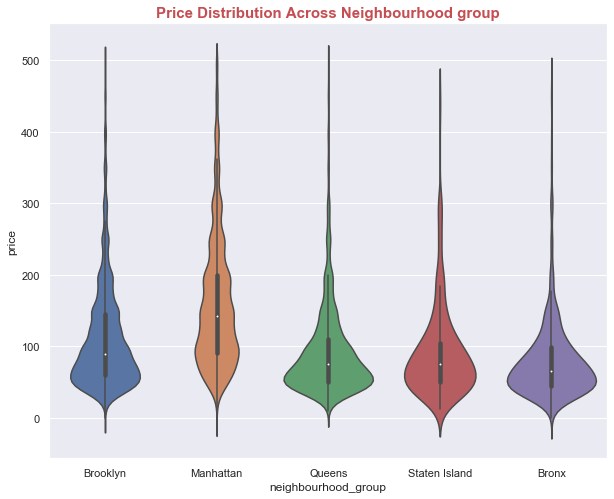

In [18]:
#violinplot
df=df[df.price<500]
chart2=sns.violinplot(data=df,x='neighbourhood_group',y='price')
chart2.set_title('Price Distribution Across Neighbourhood group',fontsize=15,color='r',fontweight='bold')
chart2

我们也可以用箱线图来观察每个区的平均数的方差，这是IBM data science课程的知识点之一。           
We can also use box plots to observe the variance of the mean of each area, which is one of the knowledge points of the IBM data science course.

Text(0.5, 1.0, 'Price distribution in different neighbourhood_group\n price<500 ')

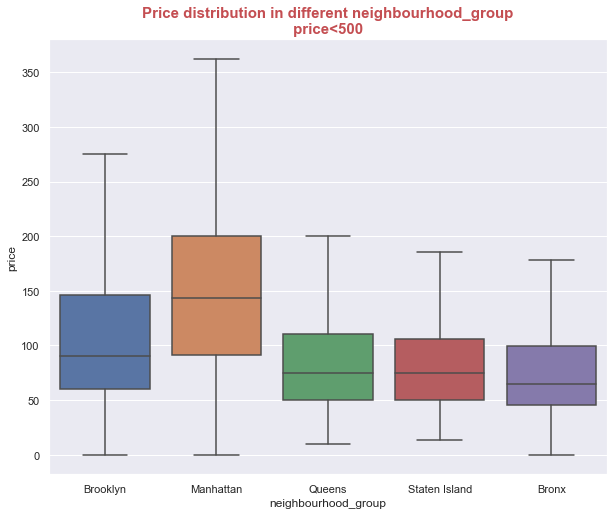

In [19]:
#boxplot
chart3=sns.boxplot(x='neighbourhood_group',y='price',data=df,showfliers=False)
chart3.set_title('Price distribution in different neighbourhood_group\n price<500 ',fontsize=15,color='r',fontweight='bold')

通过以上两个图，我们可以知道：    
①Manhattan的房价是最高的。价格的区间也很大。Manhattan的平均房价在145万美元左右。      
②客户的原来所在的Queens和即将搬入的Staten Island的房价情况很相似。Queens的房价价格区间比较大一些。因此，从Queens搬到Staten Island上，从资金上看是一个合理的选择。

Through the above two figures, we can know:     
①Manhattan's housing prices are the highest. The price range is also very large. The average house price in Manhattan is around $1.45 million.     
②The housing prices of the client's original Queens and Staten Island that they will move into are very similar. The price range of Queens house prices is relatively large. Therefore, moving from Queens to Staten Island is a reasonable choice from a financial point of view.     

我们用地理信息图来观察纽约市地理位置和房价之间的关系。    
We use geographic information maps to observe the relationship between New York City's geographic location and housing prices.

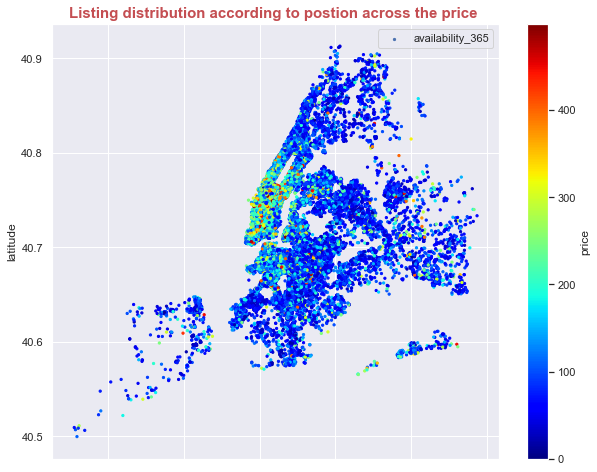

In [21]:
#longitude and latitude across listings
chart4=df.plot(figsize=(10,8),kind='scatter',x='longitude',y='latitude',marker='.',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True)
chart4.set_title('Listing distribution according to postion across the price ',fontsize=15,color='r',fontweight='bold')
chart4

毫无疑问，就房价而言，纽约市的中心区域是曼哈顿，其次是布鲁克林。在皇后区靠东有一部分高价房区，有可能是豪华住宅区。    
There is no doubt that in terms of housing prices, the central area of New York City is Manhattan, followed by Brooklyn. There are some high-priced housing areas in the east of Queens, which may be luxurious residential areas.

#### The relationship between housing type and price 房源类型与房价的关系

接下来我们要考虑房源类型与房价的关系。     
Next we have to consider the relationship between housing types and housing prices.

Text(0.5, 1.0, 'Average Price by Room Type')

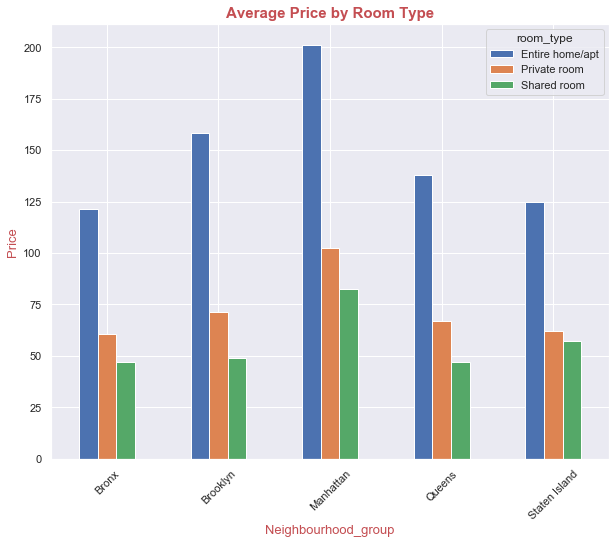

In [22]:
#the relationship btw room_type and price
pivot_table2=df.pivot_table(values='price',index='neighbourhood_group',columns='room_type',aggfunc='mean').plot.bar()
pivot_table2.set_ylabel('Price',color='r',fontsize=13)
pivot_table2.set_xlabel('Neighbourhood_group',color='r',fontsize=13)
pivot_table2.set_xticklabels(pivot_table2.get_xticklabels(),rotation=45)
pivot_table2.set_title('Average Price by Room Type',fontsize=15,color='r',fontweight='bold')

我们可以看到Entire home/apt的房价要明显高得多。     
We can see that the price of Entire home/apt is significantly higher.

接下来我们观察房源的情况，可以看到，曼哈顿区的房源是远远高于其他地区的。其次就是布鲁克林区。而Staten Island的房源相当少。   
Next, we observe the housing situation, we can see that the housing in Manhattan is much higher than other areas. The second is Brooklyn. And Staten Island has very few listings.

Text(0.5, 1.0, 'Num of listing by Room Type across zone')

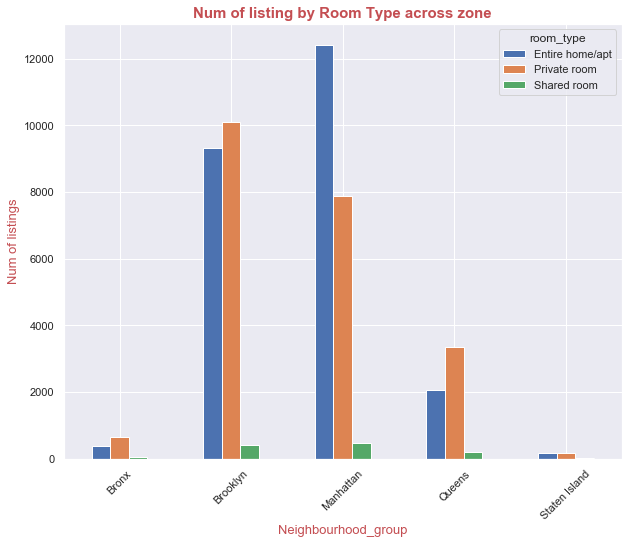

In [23]:
# check the number of listings by Room Type across zone
pivot_table3=df.pivot_table(values='price',index='neighbourhood_group',columns='room_type',aggfunc='count').plot.bar()
pivot_table3.set_xlabel('Neighbourhood_group',color='r',fontsize=13)
pivot_table3.set_ylabel('Num of listings',color='r',fontsize=13)
pivot_table3.set_xticklabels(pivot_table2.get_xticklabels(),rotation=45)
pivot_table3.set_title('Num of listing by Room Type across zone',fontsize=15,color='r',fontweight='bold')

根据以上的图表，我们可以根据客户的购房预算，向他们推荐不同的房屋类型。      
According to the above chart, we can recommend different types of houses to customers according to their purchase budget.

#### Research housing prices by region 根据地区研究房价

接下来我们根据number_of_review以及price观察一下热门的房源，并且计算该地区的的平均房价。     
Next, we observe the popular listings based on number_of_review and price, and calculate the average house price in the area.

In [56]:
review_price=df.sort_values(by=['price'],ascending=False)
review_price.head(10)

name    host_id  \
45815      Luxury 3/2 in Prime Lower East with Elevator!    8014888   
8792                 Beautiful 1205 ft classic NoHo Loft   29769754   
13582                       Noho Broadway 2 Bedroom Loft   50760546   
19151   Bluebird Hell's Kitchen 1-BR + Full Service Spa!   95459395   
37118  ✨✨Union Square Duplex LOFT•••4 BEDS✨✨MUST SEE ...   48762596   
19136          Hotel Style KG/QN Room WYNDHAM MIDTOWN 45   96098402   
2217           2 floor Luxury Loft in the best location!    3740730   
36988        Hell's Kitchen Luxurious 2 Bedroom NYC Apt!  163251048   
44557            Elegant Top Floor 3BD/2 Bath in Chelsea  257897148   
44501            Heart of SoHo: Spring Street 3 Bed Loft  257889696   

      neighbourhood_group   neighbourhood  latitude  longitude  \
45815           Manhattan       Chinatown  40.71801  -73.99430   
8792            Manhattan            NoHo  40.72590  -73.99390   
13582           Manhattan            NoHo  40.72895  -73.99340   
19151           Manhattan  Hell's Kitchen  40.76115  -73.99823   
37118           Manhattan        Gramercy  40.73670  -73.98985   
19136           Manhattan         Midtown  40.75344  -73.97207   
2217            Manhattan         Chelsea  40.74398  -73.99624   
36988           Manhattan  Hell's Kitchen  40.76094  -73.99778   
44557           Manhattan         Chelsea  40.74287  -73.99785   
44501           Manhattan            SoHo  40.72249  -73.99758   

             room_type  price  minimum_nights  number_of_reviews  \
45815  Entire home/apt    499               4                  6   
8792   Entire home/apt    499               3                 35   
13582  Entire home/apt    499              30                  0   
19151  Entire home/apt    499              30                  0   
37118  Entire home/apt    499               5                 28   
19136     Private room    499               3                  7   
2217   Entire home/apt    499               6                127   
36988  Entire home/apt    499              30                  0   
44557  Entire home/apt    499               5                  6   
44501  Entire home/apt    499               4                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  
45815               4.62                               1               299  
8792                0.72                               1               223  
13582               0.00                              31               167  
19151               0.00                              18               146  
37118               3.36                               1               145  
19136               0.21                              12               365  
2217                1.68                               2               303  
36988               0.00                               8               185  
44557               3.46                               1               132  
44501               2.73                               1               194

In [55]:
review_number_of_reviews=df.sort_values(by=['number_of_reviews'],ascending=False)
review_number_of_reviews.head(10)

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [54]:
avg_price=review_price.price.mean()
avg_price

130.0539026437264

现在我们可知纽约地区的平均房价是130万美元。      
最高房价可达499万美元，主要集中在Manhattan。     
最受欢迎的还是Queens和Manhattan的房子，其次是Brooklyn的房子。

Now we know that the average house price in New York is $1.3 million.
The highest house price can reach 4.99 million US dollars, mainly in Manhattan.
The most popular ones are Queens and Manhattan houses, followed by Brooklyn houses.

#### House price of Pleasant Plains

下面我们要获得Staten Island的平均房价，并将其和住户原来所在Neighbourhood的房价进行对比。    
Below we want to obtain the average house price of Staten Island and compare it with the house price of the neighborhood where the residents were originally located.

In [59]:
review_statenisland = review_price.loc[top_review["neighbourhood_group"] == "Staten Island"]
review_statenisland

name    host_id  \
48533  Staten Island Resort minutes from ferry! Amazi...   28586423   
10722                 large house with inground pool/spa   43524236   
42636                   Brand new home in Staten island!  249104360   
11373                         Staten Island NYC Marathon   46305818   
41443   FairPlay BNB for alternative life style renters!  241924064   
...                                                  ...        ...   
29738       Newly Renovated Guest Room with Private Bath   34635838   
34153                                       Happy home 2  158178970   
957                      Enjoy Staten Island Hospitality    1887999   
29852  Spacious Room4 Rent Near Hospital in Staten Is...   46723570   
45646                                       Happy Home 3  158178970   

      neighbourhood_group  neighbourhood  latitude  longitude  \
48533       Staten Island      Stapleton  40.62878  -74.07301   
10722       Staten Island      Todt Hill  40.60926  -74.10092   
42636       Staten Island    Grymes Hill  40.61572  -74.08901   
11373       Staten Island    Shore Acres  40.60597  -74.06208   
41443       Staten Island    Shore Acres  40.60525  -74.06745   
...                   ...            ...       ...        ...   
29738       Staten Island    Bull's Head  40.60295  -74.17117   
34153       Staten Island  Randall Manor  40.62972  -74.12539   
957         Staten Island   Graniteville  40.62109  -74.16534   
29852       Staten Island    South Beach  40.58950  -74.09663   
45646       Staten Island  Randall Manor  40.63136  -74.12559   

             room_type  price  minimum_nights  number_of_reviews  \
48533  Entire home/apt    450               5                  0   
10722  Entire home/apt    429               2                  4   
42636  Entire home/apt    300               5                  1   
11373     Private room    300               1                  0   
41443  Entire home/apt    300               1                  0   
...                ...    ...             ...                ...   
29738     Private room     25               1                 34   
34153     Private room     22               1                 21   
957       Private room     20               3                 80   
29852      Shared room     20               4                  1   
45646      Shared room     13               1                  9   

       reviews_per_month  calculated_host_listings_count  availability_365  
48533               0.00                               1                88  
10722               0.09                               1                 0  
42636               0.58                               1               174  
11373               0.00                               1                 0  
41443               0.00                               1                87  
...                  ...                             ...               ...  
29738               2.06                               2                 0  
34153               1.77                               3               261  
957                 0.92                               1               226  
29852               0.06                               1                 0  
45646               5.51                               3                 8  

[367 rows x 13 columns]

In [44]:
avg_price_statenisland=top_review_statenisland.price.mean()
avg_price_statenisland

91.14441416893733

In [65]:
neighbourhood_s = review_statenisland.neighbourhood.value_counts()  
neighbourhood_s

St. George                    47
Tompkinsville                 42
Stapleton                     27
Concord                       26
Arrochar                      20
Randall Manor                 18
West Brighton                 18
Clifton                       15
Great Kills                   10
Port Richmond                  9
Mariners Harbor                8
South Beach                    8
New Springville                8
Rosebank                       7
Dongan Hills                   7
Grymes Hill                    7
Shore Acres                    7
Tottenville                    7
Bull's Head                    6
Midland Beach                  6
Grant City                     6
New Dorp Beach                 5
Emerson Hill                   5
New Brighton                   5
Oakwood                        5
Castleton Corners              4
Arden Heights                  4
Todt Hill                      4
Prince's Bay                   3
Eltingville                    3
Granitevil

由于数据统计年份可能有所不同，因此我们在Kaggle的数据中也没有找到Pleasant Plains。因此我们用Pleasant Plains附近的Castleton Corners的房价来代替Pleasant Plains的房价。两个Neighbourhood距离很小，房价差距应该不是很大。      
Since the statistical year may be different, we did not find Pleasant Plains in the Kaggle data. Therefore, we replaced the price of Pleasant Plains with the price of Castleton Corners near Pleasant Plains. The distance between the two Neighborhoods is very small, and the difference in housing prices should not be very large.

In [66]:
review_pp = review_statenisland.loc[review_statenisland["neighbourhood"]=="Castleton Corners"]
review_pp

name    host_id  \
13682  Newly renovated house 4 bedroom. Minutes from NYC   10721093   
41361                       3 Private rooms,shared space   17473098   
19778                       Delightful studio apartment.  102526590   
9345     Spacious, Clean , Close to Local Transportation   37360127   

      neighbourhood_group      neighbourhood  latitude  longitude  \
13682       Staten Island  Castleton Corners  40.61042  -74.12277   
41361       Staten Island  Castleton Corners  40.62373  -74.11773   
19778       Staten Island  Castleton Corners  40.62063  -74.13001   
9345        Staten Island  Castleton Corners  40.61363  -74.12152   

             room_type  price  minimum_nights  number_of_reviews  \
13682  Entire home/apt    299               3                 49   
41361     Private room    150               1                  0   
19778  Entire home/apt     65               2                 52   
9345      Private room     45              30                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
13682               1.91                               1               350  
41361               0.00                               1                 0  
19778               1.95                               1                40  
9345                0.00                               1               365

In [71]:
avg_price_pp=review_pp.price.mean()
avg_price_pp

139.75

可以看到，Pleasant Plains附近的平均房价为139.75。但是价格区间从45到299，客户有很多选择。      
It can be seen that the average house price near Pleasant Plains is 139.75. But the price range is from 45 to 299, customers have many choices.

#### House prince of Bay Terrace
下面我们再来探究Bay Terrace附近的房价。    
Let's explore the housing prices near Bay Terrace.

In [67]:
review_bt = review_statenisland.loc[review_statenisland["neighbourhood"]=="Bay Terrace, Staten Island"]
review_bt

name    host_id  \
25146  BIG-3 BDRM house, 1hr to Manhattan, near beach    7927832   
42862  Modern studio/private entrance/superb location  250580779   

      neighbourhood_group               neighbourhood  latitude  longitude  \
25146       Staten Island  Bay Terrace, Staten Island  40.55182  -74.14439   
42862       Staten Island  Bay Terrace, Staten Island  40.55105  -74.13660   

             room_type  price  minimum_nights  number_of_reviews  \
25146  Entire home/apt    150               3                  1   
42862  Entire home/apt     55              30                  2   

       reviews_per_month  calculated_host_listings_count  availability_365  
25146               0.09                               1                 0  
42862               0.82                               1                 0

In [72]:
avg_price_bt=review_bt.price.mean()
avg_price_bt

102.5

由以上可知，Bay Terrace附近的平均房价为102.5。价格区间为55到150.但是选择并不算很多。     
From the above, the average house price near Bay Terrace is 102.5. The price range is 55 to 150. But the choices are not many.

#### Client's original neighbourhood house price / 客户原Neighbourhood的房价

接下来我们再来考虑客户原来的住所的房价。     
Next, let’s consider the price of the customer’s original residence

In [45]:
top_review_Queens = top_review.loc[top_review["neighbourhood_group"] == "Queens"]
top_review_Queens.head()

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
1271                    My Little Guest Room in Flushing   2680820   

      neighbourhood_group  neighbourhood  latitude  longitude     room_type  \
11759              Queens        Jamaica  40.66730  -73.76831  Private room   
13495              Queens        Jamaica  40.66939  -73.76975  Private room   
10623              Queens  East Elmhurst  40.77006  -73.87683  Private room   
20403              Queens  East Elmhurst  40.76335  -73.87007  Private room   
1271               Queens       Flushing  40.75578  -73.81948  Private room   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
11759     47               1                629              14.58   
13495     47               1                576              13.40   
10623     46               1                543              11.59   
20403     48               1                510              16.22   
1271      55               1                474               5.53   

       calculated_host_listings_count  availability_365  
11759                               2               333  
13495                               2               173  
10623                               5               163  
20403                               5               341  
1271                                3               332

In [46]:
avg_price_Queens=top_review_Queens.price.mean()
avg_price_Queens

92.34458259325045

我们可以知道，Queens的平均房价为92万美元。这与Staten Island几乎相同。但是Queens的房源选择要多得多。      
We can know that the average house price of Queens is US$920,000. This is almost the same as Staten Island. But Queens has a lot more housing options.

In [77]:
#top_review_Queens.neighbourhood.value_counts() 

我们再来具体考虑Hillcrest的房价。     
Let us look at Hillcrest's housing prices.

由于数据统计年份可能有所不同，因此我们在Kaggle的数据中也没有找到Hillcrest。因此我们用Hillcrest附近的Jamaica Hills的房价来代替Hillcrest的房价。两个Neighbourhood距离很小，房价差距应该不是很大。     
Since the statistical year may be different, we did not find Hillcrest in the Kaggle data. Therefore, we used the housing prices in Jamaica Hills near Hillcrest to replace the housing prices in Hillcrest. The distance between the two Neighborhoods is very small, and the difference in housing prices should not be very large.

In [79]:
#Hillcrest
top_review_h = top_review_Queens.loc[top_review_Queens["neighbourhood"] == "Jamaica Hills"]
top_review_h.head()

name    host_id  \
41559  RM#2-Bright room w/balcony 30 mins NYC & airports  241963980   
19555                    Room near NYC airports + trains   87393824   
41048  ALL NEW LUXURY APT- 1ST FL 4BR/2 BTH,10MIN-JFK...  215385823   
43134                   Apartment minutes from manhattan  252168489   
46061  LUXURY 2ND FL,4BR/2 FUL BTH,SLEEP 8+,15MIN-JFK...  215385823   

      neighbourhood_group  neighbourhood  latitude  longitude  \
41559              Queens  Jamaica Hills  40.71686  -73.79742   
19555              Queens  Jamaica Hills  40.71245  -73.79806   
41048              Queens  Jamaica Hills  40.71378  -73.80292   
43134              Queens  Jamaica Hills  40.71022  -73.79665   
46061              Queens  Jamaica Hills  40.71209  -73.80151   

             room_type  price  minimum_nights  number_of_reviews  \
41559     Private room     67               2                 25   
19555     Private room     65               1                 16   
41048  Entire home/apt    275               1                 11   
43134  Entire home/apt    110               2                  8   
46061  Entire home/apt    325               2                  4   

       reviews_per_month  calculated_host_listings_count  availability_365  
41559               6.88                               2               318  
19555               0.50                               1                 0  
41048               7.50                               2               280  
43134               3.16                               1                81  
46061               4.00                               2               124

In [80]:
avg_price_h=top_review_h.price.mean()
avg_price_h

132.125

我们可以看到，客户原本的住处的房价均价为132.125万美元，大约为纽约市房价的平均水平。     
We can see that the average price of the customer’s original residence was US$1.321 million, which is close to the average price of New York City.

# Results

通过探索客户对Donut Shop以及Bus Stops的要求，两个社区：“Pleasant Plains”，“Bay Terrace”都可以基本满足客户的需求。    
此外，他们都和“Hillcrest”一样，处于第一集群内。 但是从Foursquare反馈回来的Bakery数据来看，似乎Pleasant Plains周围的Bakery更受欢迎一些。     
相比于Bay Terrace，Pleasant Plains更靠近主要道路，这更加方便客户出行。    
Bay Terrace，Pleasant Plains周围的房价都差不多。Hillcrest的房子的价格和这两个Neighbourhood很接近。但是Pleasant Plains附近有更多出售的房屋，而且有很多不同的价格，选择很多。     
因此，我们公司认为，Pleasant Plains是客户在Staten Island上的最佳选择。    


By exploring customer requirements for Donut Shop and Bus Stops, the two communities: "Pleasant Plains" and "Bay Terrace" can basically meet customer needs.       
In addition, they are all in the first cluster just like "Hillcrest". But from the Bakery data returned by Foursquare, it seems that Bakery around Pleasant Plains is more popular.     
Compared to Bay Terrace, Pleasant Plains is closer to the main road, which is more convenient for customers to travel.
House prices around Bay Terrace and Pleasant Plains are similar. The price of Hillcrest's house is very close to these two Neighborhoods. But there are more houses for sale near Pleasant Plains, and there are many different prices and many choices.       
Therefore, our company believes that Pleasant Plains is the best choice for customers on Staten Island.


# Discussion

其实这两个街区各有特点，我们再看一下他们的地理信息。     
In fact, these two blocks have their own characteristics. Let's take a look at their geographic information.

In [108]:
latitude_pp = 40.524699
longitude_pp = -74.219831
latitude_bt = 40.553988
longitude_bt = -74.139166

venues_map_R = folium.Map(location=[(latitude_pp+latitude_bt)/2, (longitude_pp+longitude_bt)/2], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Pleasant Plains
folium.CircleMarker(
    [latitude_pp, longitude_pp],
    radius=10,
    color='red',
    popup='Pleasant Plains',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map_R)

# add a red circle marker to represent the Bay Terrace
folium.CircleMarker(
    [latitude_bt, longitude_bt],
    radius=10,
    color='Blue',
    popup='Bay Terrace',
    fill = True,
    fill_color = 'Blue',
    fill_opacity = 0.6
).add_to(venues_map_R)


venues_map_R

从地图上可以观察到：    
It can be observed from the map:      

Pleasant Plains是非常靠近New Jersey的，它离New York City的市中心已经很远了。但是由于它处在交通干道上，因此该Neighborhood的交通比较方便。Pleasant Plains离海岸线较远，四周有Bloomingdale Park和Long Poind Park可以供人活动。       
Pleasant Plains is very close to New Jersey, it is far from the center of New York City. However, because it is on the main traffic road, the traffic in this Neighborhood is more convenient. Pleasant Plains is far from the coastline, surrounded by Bloomingdale Park and Long Poind Park for people to move around.      

Bay Terrace附近只有一般的道路，出远门可能不太方便。但是它的地理位置与New York City的市中心更加接近。Bay Terrace附近有Great Kills Park以及GreatKills Harbor，是与客户原来的住所Hillcrest不太一样的海滩风情。      
There are only general roads near Bay Terrace, so traveling far away may not be convenient. But its location is closer to the city center of New York City. There are Great Kills Park and GreatKills Harbor near Bay Terrace, which have a different beach style from the client’s original residence, Hillcrest.

这两个潜在的Neighborhood相距也不远，而且由Amboy Road连接。这些需求场所可能就在地理位置之间。 因此，他们都很适合我们的客户。如果客户想尝试一些新的东西，那么Bay Terrace也是一个不错的选择。     
It is likely that those venues of requirements are just between their geographically.Therefore, they are very suitable for our customers. If customers want to try something new, Bay Terrace is also a good choice.

# Conclusion

这个结果具有一定的局限性。该项目中使用的数据是来自每个社区的出现率前10的Venue，这可能会会略那些总venues很多，而且Bakery和Bus stops也很多，但是Bakery和Busstops所占的比例较低的Neighborhood.     
This result has certain limitations. The data used in this project is from the top 10 Venues in each community, which may omit those who have a lot of total venues, and there are also many Bakery and Bus stops, but the proportion of Bakery and Busstops is low in Neighborhood.

其次，我们使用1km作为半径探索Neighborhood，是出于客户不经常开车的原因。但是客户也许会因为Venues的不同，而改变他们的出行方式。因此还有待改进。      
Secondly, we use 1km as the radius to explore Neighborhood, because customers don't drive often. But customers may change their way of travel because of the difference in Venues. So there is room for improvement.

总之，Pleasant Plains和Bay Terrace可以满足我们顾客的基本要求。Henda公司强烈推荐Pleasant Plains。但可能存在更好的选择。我们最终的选择权仍然留在顾客手中。      
In short, Pleasant Plains and Bay Terrace can meet the basic requirements of our customers.Henda strongly recommends Pleasant Plains. But there may be better options.Our ultimate choice remains in the hands of customers.